In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# read data function

In [2]:
def read_abcd(path, cols, na_values):
    
    df = pd.read_csv(path, sep='\t', index_col='subjectkey', na_values=na_values)
    df = df.drop(df.index[0])
    
    for col in cols:
        df[col] = pd.to_numeric(df[col])
        df = df[cols]

    df = df.reset_index()
    df = df.sort_values(['subjectkey', 'interview_age'])
    df = df.drop_duplicates(subset=['subjectkey'], keep='first')
    df = df.drop(columns=['interview_age'])
    df = df.set_index('subjectkey')
    
    df_show = abcd_ysu02.join(df)
    df_show = df_show.drop(columns=[
        'isip_1d_2',
        'isip_5_2',
        'isip_1b_yn'
    ])
     
    for col in df_show.columns:
        print('{:<30}    n = {:<10}    mean = {:<10.4f}'.\
              format(col,  df_show[col].notnull().sum(), df_show[col].mean()))    
    print('\nsubjects:{:>10}\nfeatures:{:>10}'.format(df_show.shape[0], df_show.shape[1]))
    
    return df

# y target variable

In [3]:
file_abcd_ysu02 = r'E:\gregn\data\ABCD\abcd3\abcd_ysu02.txt'
abcd_ysu02 = pd.read_csv(file_abcd_ysu02, sep='\t', index_col='subjectkey')
abcd_ysu02 = abcd_ysu02.drop(abcd_ysu02.index[0])
cols = [
    'interview_age',
    'isip_1d_2',
    'isip_5_2',
    'isip_1b_yn'
]

for col in cols:
    abcd_ysu02[col] = pd.to_numeric(abcd_ysu02[col])
    abcd_ysu02 = abcd_ysu02[cols]
    
abcd_ysu02 = abcd_ysu02.reset_index()
abcd_ysu02 = abcd_ysu02.sort_values(['subjectkey', 'interview_age'])
abcd_ysu02 = abcd_ysu02.drop_duplicates(subset=['subjectkey'], keep='first')
abcd_ysu02 = abcd_ysu02.drop(columns=['interview_age'])
abcd_ysu02 = abcd_ysu02.set_index('subjectkey')
    
abcd_ysu02 = abcd_ysu02.drop(abcd_ysu02[abcd_ysu02.isip_5_2 == 3].index) # drop accidental 
abcd_ysu02 = abcd_ysu02.drop(abcd_ysu02[abcd_ysu02.isip_5_2 == 2].index) # drop sneaky 
abcd_ysu02 = abcd_ysu02.drop(abcd_ysu02[abcd_ysu02.isip_1b_yn == 0].index) # drop religious 
abcd_ysu02 = abcd_ysu02.drop(abcd_ysu02[abcd_ysu02.isip_1d_2 > 10].index)

abcd_ysu02['isip_1d_2'] = abcd_ysu02['isip_1d_2'].fillna(0)

y = abcd_ysu02['isip_1d_2'].values
y = np.where(y>0, 1, y)

unique, counts = np.unique(y, return_counts=True)

print('number of subjects: {:>10}\n\n[0] never sipped: {:>12}\n[1] sipped by age 10:{:>9}'.\
      format(len(y), counts[0], counts[1]))

number of subjects:      10707

[0] never sipped:         9209
[1] sipped by age 10:     1498


# midaparc03

In [4]:
path = r'E:\gregn\data\ABCD\abcd3\midaparc03.txt'

cols = [
    'interview_age',
    
    # thalamus-proper
    'tfmri_ma_acdn_b_scs_tplh',
    'tfmri_ma_acdn_b_scs_tprh',
    'tfmri_ma_acvn_b_scs_tplh',
    'tfmri_ma_acvn_b_scs_tprh',
    'tfmri_ma_rpvnfb_b_scs_tplh',
    'tfmri_ma_rpvnfb_b_scs_tprh',
    'tfmri_ma_lpvnfb_b_scs_tplh',
    'tfmri_ma_lpvnfb_b_scs_tprh',
    'tfmri_ma_alrvn_b_scs_tplh',
    'tfmri_ma_alrvn_b_scs_tprh',
    'tfmri_ma_asrvn_b_scs_tplh',
    'tfmri_ma_asrvn_b_scs_tprh',
    'tfmri_ma_alvcr_b_scs_tplh',
    'tfmri_ma_alvcr_b_scs_tprh',
    'tfmri_ma_aclvn_b_scs_tplh',
    'tfmri_ma_aclvn_b_scs_tprh',
    'tfmri_ma_acmvn_b_scs_tplh',
    'tfmri_ma_acmvn_b_scs_tprh',
    'tfmri_ma_acgml_b_scs_tplh',
    'tfmri_ma_acgml_b_scs_tprh',
    
    # caudate
    'tfmri_ma_acdn_b_scs_cdlh',
    'tfmri_ma_acdn_b_scs_cdrh',
    'tfmri_ma_acvn_b_scs_cdlh',
    'tfmri_ma_acvn_b_scs_cdrh',
    'tfmri_ma_rpvnfb_b_scs_cdlh',
    'tfmri_ma_rpvnfb_b_scs_cdrh',
    'tfmri_ma_lpvnfb_b_scs_cdlh',
    'tfmri_ma_lpvnfb_b_scs_cdrh',
    'tfmri_ma_alrvn_b_scs_cdlh',
    'tfmri_ma_alrvn_b_scs_cdrh',
    'tfmri_ma_asrvn_b_scs_cdlh',
    'tfmri_ma_asrvn_b_scs_cdrh',
    'tfmri_ma_alvcr_b_scs_cdlh',
    'tfmri_ma_alvcr_b_scs_cdrh',
    'tfmri_ma_aclvn_b_scs_cdlh',
    'tfmri_ma_aclvn_b_scs_cdrh',
    'tfmri_ma_acmvn_b_scs_cdlh',
    'tfmri_ma_acmvn_b_scs_cdrh',
    'tfmri_ma_acgml_b_scs_cdlh',
    'tfmri_ma_acgml_b_scs_cdrh',    
    
    # putamen
    'tfmri_ma_acdn_b_scs_ptlh',
    'tfmri_ma_acdn_b_scs_ptrh',
    'tfmri_ma_acvn_b_scs_ptlh',
    'tfmri_ma_acvn_b_scs_ptrh',
    'tfmri_ma_rpvnfb_b_scs_ptlh',
    'tfmri_ma_rpvnfb_b_scs_ptrh',
    'tfmri_ma_lpvnfb_b_scs_ptlh',
    'tfmri_ma_lpvnfb_b_scs_ptrh',
    'tfmri_ma_alrvn_b_scs_ptlh',
    'tfmri_ma_alrvn_b_scs_ptrh',
    'tfmri_ma_asrvn_b_scs_ptlh',
    'tfmri_ma_asrvn_b_scs_ptrh',
    'tfmri_ma_alvcr_b_scs_ptlh',
    'tfmri_ma_alvcr_b_scs_ptrh',
    'tfmri_ma_aclvn_b_scs_ptlh',
    'tfmri_ma_aclvn_b_scs_ptrh',
    'tfmri_ma_acmvn_b_scs_ptlh',
    'tfmri_ma_acmvn_b_scs_ptrh',
    'tfmri_ma_acgml_b_scs_ptlh',
    'tfmri_ma_acgml_b_scs_ptrh',  
    
    # pallidum
    'tfmri_ma_acdn_b_scs_pdlh',
    'tfmri_ma_acdn_b_scs_pdrh',
    'tfmri_ma_acvn_b_scs_pdlh',
    'tfmri_ma_acvn_b_scs_pdrh',
    'tfmri_ma_rpvnfb_b_scs_pdlh',
    'tfmri_ma_rpvnfb_b_scs_pdrh',
    'tfmri_ma_lpvnfb_b_scs_pdlh',
    'tfmri_ma_lpvnfb_b_scs_pdrh',
    'tfmri_ma_alrvn_b_scs_pdlh',
    'tfmri_ma_alrvn_b_scs_pdrh',
    'tfmri_ma_asrvn_b_scs_pdlh',
    'tfmri_ma_asrvn_b_scs_pdrh',
    'tfmri_ma_alvcr_b_scs_pdlh',
    'tfmri_ma_alvcr_b_scs_pdrh',
    'tfmri_ma_aclvn_b_scs_pdlh',
    'tfmri_ma_aclvn_b_scs_pdrh',
    'tfmri_ma_acmvn_b_scs_pdlh',
    'tfmri_ma_acmvn_b_scs_pdrh',
    'tfmri_ma_acgml_b_scs_pdlh',
    'tfmri_ma_acgml_b_scs_pdrh',    
      
    # amygdala
    'tfmri_ma_acdn_b_scs_aylh',
    'tfmri_ma_acdn_b_scs_ayrh',
    'tfmri_ma_acvn_b_scs_aylh',
    'tfmri_ma_acvn_b_scs_ayrh',
    'tfmri_ma_rpvnfb_b_scs_aylh',
    'tfmri_ma_rpvnfb_b_scs_ayrh',
    'tfmri_ma_lpvnfb_b_scs_aylh',
    'tfmri_ma_lpvnfb_b_scs_ayrh',
    'tfmri_ma_alrvn_b_scs_aylh',
    'tfmri_ma_alrvn_b_scs_ayrh',
    'tfmri_ma_asrvn_b_scs_aylh',
    'tfmri_ma_asrvn_b_scs_ayrh',
    'tfmri_ma_alvcr_b_scs_aylh',
    'tfmri_ma_alvcr_b_scs_ayrh',
    'tfmri_ma_aclvn_b_scs_aylh',
    'tfmri_ma_aclvn_b_scs_ayrh',
    'tfmri_ma_acmvn_b_scs_aylh',
    'tfmri_ma_acmvn_b_scs_ayrh',
    'tfmri_ma_acgml_b_scs_aylh',
    'tfmri_ma_acgml_b_scs_ayrh',    
    
     # accumbens-area
    'tfmri_ma_acdn_b_scs_aalh',
    'tfmri_ma_acdn_b_scs_aarh',
    'tfmri_ma_acvn_b_scs_aalh',
    'tfmri_ma_acvn_b_scs_aarh',
    'tfmri_ma_rpvnfb_b_scs_aalh',
    'tfmri_ma_rpvnfb_b_scs_aarh',
    'tfmri_ma_lpvnfb_b_scs_aalh',
    'tfmri_ma_lpvnfb_b_scs_aarh',
    'tfmri_ma_alrvn_b_scs_aalh',
    'tfmri_ma_alrvn_b_scs_aarh',
    'tfmri_ma_asrvn_b_scs_aalh',
    'tfmri_ma_asrvn_b_scs_aarh',
    'tfmri_ma_alvcr_b_scs_aalh',
    'tfmri_ma_alvcr_b_scs_aarh',
    'tfmri_ma_aclvn_b_scs_aalh',
    'tfmri_ma_aclvn_b_scs_aarh',
    'tfmri_ma_acmvn_b_scs_aalh',
    'tfmri_ma_acmvn_b_scs_aarh',
    'tfmri_ma_acgml_b_scs_aalh',
    'tfmri_ma_acgml_b_scs_aarh',     
    
     # brain-stem
    'tfmri_ma_acdn_b_scs_bs',
    'tfmri_ma_acvn_b_scs_bs',
    'tfmri_ma_rpvnfb_b_scs_bs',
    'tfmri_ma_lpvnfb_b_scs_bs',
    'tfmri_ma_alrvn_b_scs_bs',
    'tfmri_ma_asrvn_b_scs_bs',
    'tfmri_ma_alvcr_b_scs_bs',
    'tfmri_ma_aclvn_b_scs_bs',
    'tfmri_ma_acmvn_b_scs_bs',
    'tfmri_ma_acgml_b_scs_bs',   
    
]

na_values = [None]
midaparc03 = read_abcd(path, cols, na_values)

tfmri_ma_acdn_b_scs_tplh          n = 9427          mean = 0.0188    
tfmri_ma_acdn_b_scs_tprh          n = 9427          mean = 0.0287    
tfmri_ma_acvn_b_scs_tplh          n = 9426          mean = 0.0135    
tfmri_ma_acvn_b_scs_tprh          n = 9426          mean = 0.0188    
tfmri_ma_rpvnfb_b_scs_tplh        n = 9426          mean = -0.0191   
tfmri_ma_rpvnfb_b_scs_tprh        n = 9426          mean = -0.0210   
tfmri_ma_lpvnfb_b_scs_tplh        n = 9425          mean = -0.0133   
tfmri_ma_lpvnfb_b_scs_tprh        n = 9425          mean = -0.0186   
tfmri_ma_alrvn_b_scs_tplh         n = 9426          mean = 0.0360    
tfmri_ma_alrvn_b_scs_tprh         n = 9426          mean = 0.0491    
tfmri_ma_asrvn_b_scs_tplh         n = 9426          mean = 0.0019    
tfmri_ma_asrvn_b_scs_tprh         n = 9426          mean = 0.0086    
tfmri_ma_alvcr_b_scs_tplh         n = 9426          mean = 0.0342    
tfmri_ma_alvcr_b_scs_tprh         n = 9426          mean = 0.0406    
tfmri_ma_aclvn_b_scs

# midaparcp203

In [5]:
path = r'E:\gregn\data\ABCD\abcd3\midaparcp203.txt'

cols = [
    'interview_age',
    
    # caudalanteriorcingulate
    'tfmri_ma_arvn_b_cds_clatcgelh',
    'tfmri_ma_arvn_b_cds_clatcgerh',
    'tfmri_ma_acvn_b_cds_clatcgelh',
    'tfmri_ma_acvn_b_cds_clatcgerh',
    'tfmri_ma_rpvnfb_b_cds_clcgelh',
    'tfmri_ma_rpvnfb_b_cds_clagerh',
    'tfmri_ma_lvnfb_b_cds_clatcgelh',
    'tfmri_ma_lvnfb_b_cds_clatcgerh',
    'tfmri_ma_alrvn_b_cds_clatcgelh',
    'tfmri_ma_alrvn_b_cds_clatcgerh',
    'tfmri_ma_asrvn_b_cds_clatcgelh',
    'tfmri_ma_asrvn_b_cds_clatcgerh',
    'tfmri_ma_alvsr_b_cds_clatcgelh',
    'tfmri_ma_alvsr_b_cds_clatcgerh',
    'tfmri_ma_allvn_b_cds_clatcgelh',
    'tfmri_ma_allvn_b_cds_clatcgerh',
    'tfmri_ma_asvn_b_cds_clatcgelh',
    'tfmri_ma_asvn_b_cds_clatcgerh',
    'tfmri_ma_alvsl_b_cds_clatcgelh',
    'tfmri_ma_alvsl_b_cds_clatcgerh',
    
    # lateraloccipital
    'tfmri_ma_arvn_b_cds_loclh',
    'tfmri_ma_arvn_b_cds_locrh',
    'tfmri_ma_acvn_b_cds_loclh',
    'tfmri_ma_acvn_b_cds_locrh',
    'tfmri_ma_rpvnfb_b_cds_loclh',
    'tfmri_ma_rpvnfb_b_cds_locrh',
    'tfmri_ma_lvnfb_b_cds_loclh',
    'tfmri_ma_lvnfb_b_cds_locrh',
    'tfmri_ma_alrvn_b_cds_loclh',
    'tfmri_ma_alrvn_b_cds_locrh',
    'tfmri_ma_asrvn_b_cds_loclh',
    'tfmri_ma_asrvn_b_cds_locrh',
    'tfmri_ma_alvsr_b_cds_loclh',
    'tfmri_ma_alvsr_b_cds_locrh',
    'tfmri_ma_allvn_b_cds_loclh',
    'tfmri_ma_allvn_b_cds_locrh',
    'tfmri_ma_asvn_b_cds_loclh',
    'tfmri_ma_asvn_b_cds_locrh',
    'tfmri_ma_alvsl_b_cds_loclh',
    'tfmri_ma_alvsl_b_cds_locrh',  
    
    # lateralorbitofrontal
    'tfmri_ma_arvn_b_cds_lobofrlh',
    'tfmri_ma_arvn_b_cds_lobofrrh',
    'tfmri_ma_acvn_b_cds_lobofrlh',
    'tfmri_ma_acvn_b_cds_lobofrrh',
    'tfmri_ma_rpvnfb_b_cds_lobofrlh',
    'tfmri_ma_rpvnfb_b_cds_lobofrrh',
    'tfmri_ma_lvnfb_b_cds_lobofrlh',
    'tfmri_ma_lvnfb_b_cds_lobofrrh',
    'tfmri_ma_alrvn_b_cds_lobofrlh',
    'tfmri_ma_alrvn_b_cds_lobofrrh',
    'tfmri_ma_asrvn_b_cds_lobofrlh',
    'tfmri_ma_asrvn_b_cds_lobofrrh',
    'tfmri_ma_alvsr_b_cds_lobofrlh',
    'tfmri_ma_alvsr_b_cds_lobofrrh',
    'tfmri_ma_allvn_b_cds_lobofrlh',
    'tfmri_ma_allvn_b_cds_lobofrrh',
    'tfmri_ma_asvn_b_cds_lobofrlh',
    'tfmri_ma_asvn_b_cds_lobofrrh',
    'tfmri_ma_alvsl_b_cds_lobofrlh',
    'tfmri_ma_alvsl_b_cds_lobofrrh',   
    
    # medialorbitofrontal
    'tfmri_ma_arvn_b_cds_mobofrlh',
    'tfmri_ma_arvn_b_cds_mobofrrh',
    'tfmri_ma_acvn_b_cds_mobofrlh',
    'tfmri_ma_acvn_b_cds_mobofrrh',
    'tfmri_ma_rpvnfb_b_cds_mobofrlh',
    'tfmri_ma_rpvnfb_b_cds_mobofrrh',
    'tfmri_ma_lvnfb_b_cds_mobofrlh',
    'tfmri_ma_lvnfb_b_cds_mobofrrh',
    'tfmri_ma_alrvn_b_cds_mobofrlh',
    'tfmri_ma_alrvn_b_cds_mobofrrh',
    'tfmri_ma_asrvn_b_cds_mobofrlh',
    'tfmri_ma_asrvn_b_cds_mobofrrh',
    'tfmri_ma_alvsr_b_cds_mobofrlh',
    'tfmri_ma_alvsr_b_cds_mobofrrh',
    'tfmri_ma_allvn_b_cds_mobofrlh',
    'tfmri_ma_allvn_b_cds_mobofrrh',
    'tfmri_ma_asvn_b_cds_mobofrlh',
    'tfmri_ma_asvn_b_cds_mobofrrh',
    'tfmri_ma_alvsl_b_cds_mobofrlh',
    'tfmri_ma_alvsl_b_cds_mobofrrh',   
    
    # parsopercularis
    'tfmri_ma_arvn_b_cds_ppclh',
    'tfmri_ma_arvn_b_cds_ppcrh',
    'tfmri_ma_acvn_b_cds_ppclh',
    'tfmri_ma_acvn_b_cds_ppcrh',
    'tfmri_ma_rpvnfb_b_cds_ppclh',
    'tfmri_ma_rpvnfb_b_cds_ppcrh',
    'tfmri_ma_lvnfb_b_cds_ppclh',
    'tfmri_ma_lvnfb_b_cds_ppcrh',
    'tfmri_ma_alrvn_b_cds_ppclh',
    'tfmri_ma_alrvn_b_cds_ppcrh',
    'tfmri_ma_asrvn_b_cds_ppclh',
    'tfmri_ma_asrvn_b_cds_ppcrh',
    'tfmri_ma_alvsr_b_cds_ppclh',
    'tfmri_ma_alvsr_b_cds_ppcrh',
    'tfmri_ma_allvn_b_cds_ppclh',
    'tfmri_ma_allvn_b_cds_ppcrh',
    'tfmri_ma_asvn_b_cds_ppclh',
    'tfmri_ma_asvn_b_cds_ppcrh',
    'tfmri_ma_alvsl_b_cds_ppclh',
    'tfmri_ma_alvsl_b_cds_ppcrh',   
    
    # posteriorcingulate
    'tfmri_ma_arvn_b_cds_pocgelh',
    'tfmri_ma_arvn_b_cds_pocgerh',
    'tfmri_ma_acvn_b_cds_pocgelh',
    'tfmri_ma_acvn_b_cds_pocgerh',
    'tfmri_ma_rpvnfb_b_cds_pocgelh',
    'tfmri_ma_rpvnfb_b_cds_pocgerh',
    'tfmri_ma_lvnfb_b_cds_pocgelh',
    'tfmri_ma_lvnfb_b_cds_pocgerh',
    'tfmri_ma_alrvn_b_cds_pocgelh',
    'tfmri_ma_alrvn_b_cds_pocgerh',
    'tfmri_ma_asrvn_b_cds_pocgelh',
    'tfmri_ma_asrvn_b_cds_pocgerh',
    'tfmri_ma_alvsr_b_cds_pocgelh',
    'tfmri_ma_alvsr_b_cds_pocgerh',
    'tfmri_ma_allvn_b_cds_pocgelh',
    'tfmri_ma_allvn_b_cds_pocgerh',
    'tfmri_ma_asvn_b_cds_pocgelh',
    'tfmri_ma_asvn_b_cds_pocgerh',
    'tfmri_ma_alvsl_b_cds_pocgelh',
    'tfmri_ma_alvsl_b_cds_pocgerh',   
    
    # precentral
    'tfmri_ma_arvn_b_cds_preclh',
    'tfmri_ma_arvn_b_cds_precrh',
    'tfmri_ma_acvn_b_cds_preclh',
    'tfmri_ma_acvn_b_cds_precrh',
    'tfmri_ma_rpvnfb_b_cds_preclh',
    'tfmri_ma_rpvnfb_b_cds_precrh',
    'tfmri_ma_lvnfb_b_cds_preclh',
    'tfmri_ma_lvnfb_b_cds_precrh',
    'tfmri_ma_alrvn_b_cds_preclh',
    'tfmri_ma_alrvn_b_cds_precrh',
    'tfmri_ma_asrvn_b_cds_preclh',
    'tfmri_ma_asrvn_b_cds_precrh',
    'tfmri_ma_alvsr_b_cds_preclh',
    'tfmri_ma_alvsr_b_cds_precrh',
    'tfmri_ma_allvn_b_cds_preclh',
    'tfmri_ma_allvn_b_cds_precrh',
    'tfmri_ma_asvn_b_cds_preclh',
    'tfmri_ma_asvn_b_cds_precrh',
    'tfmri_ma_alvsl_b_cds_preclh',
    'tfmri_ma_alvsl_b_cds_precrh',    
    
    # precuneus
    'tfmri_ma_arvn_b_cds_pulh',
    'tfmri_ma_arvn_b_cds_purh',
    'tfmri_ma_acvn_b_cds_pulh',
    'tfmri_ma_acvn_b_cds_purh',
    'tfmri_ma_rpvnfb_b_cds_pulh',
    'tfmri_ma_rpvnfb_b_cds_purh',
    'tfmri_ma_lvnfb_b_cds_pulh',
    'tfmri_ma_lvnfb_b_cds_purh',
    'tfmri_ma_alrvn_b_cds_pulh',
    'tfmri_ma_alrvn_b_cds_purh',
    'tfmri_ma_asrvn_b_cds_pulh',
    'tfmri_ma_asrvn_b_cds_purh',
    'tfmri_ma_alvsr_b_cds_pulh',
    'tfmri_ma_alvsr_b_cds_purh',
    'tfmri_ma_allvn_b_cds_pulh',
    'tfmri_ma_allvn_b_cds_purh',
    'tfmri_ma_asvn_b_cds_pulh',
    'tfmri_ma_asvn_b_cds_purh',
    'tfmri_ma_alvsl_b_cds_pulh',
    'tfmri_ma_alvsl_b_cds_purh',   
    
    # insula
    'tfmri_ma_arvn_b_cds_insulalh',
    'tfmri_ma_arvn_b_cds_insularh',
    'tfmri_ma_acvn_b_cds_insulalh',
    'tfmri_ma_acvn_b_cds_insularh',
    'tfmri_ma_rpvnfb_b_cds_insulalh',
    'tfmri_ma_rpvnfb_b_cds_insularh',
    'tfmri_ma_lvnfb_b_cds_insulalh',
    'tfmri_ma_lvnfb_b_cds_insularh',
    'tfmri_ma_alrvn_b_cds_insulalh',
    'tfmri_ma_alrvn_b_cds_insularh',
    'tfmri_ma_asrvn_b_cds_insulalh',
    'tfmri_ma_asrvn_b_cds_insularh',
    'tfmri_ma_alvsr_b_cds_insulalh',
    'tfmri_ma_alvsr_b_cds_insularh',
    'tfmri_ma_allvn_b_cds_insulalh',
    'tfmri_ma_allvn_b_cds_insularh',
    'tfmri_ma_asvn_b_cds_insulalh',
    'tfmri_ma_asvn_b_cds_insularh',
    'tfmri_ma_alvsl_b_cds_insulalh',
    'tfmri_ma_alvsl_b_cds_insularh',    
    
]

na_values = [None]
midaparcp203 = read_abcd(path, cols, na_values)

tfmri_ma_arvn_b_cds_clatcgelh     n = 9427          mean = 0.0261    
tfmri_ma_arvn_b_cds_clatcgerh     n = 9427          mean = 0.0344    
tfmri_ma_acvn_b_cds_clatcgelh     n = 9426          mean = 0.0060    
tfmri_ma_acvn_b_cds_clatcgerh     n = 9426          mean = 0.0133    
tfmri_ma_rpvnfb_b_cds_clcgelh     n = 9426          mean = -0.0129   
tfmri_ma_rpvnfb_b_cds_clagerh     n = 9426          mean = -0.0090   
tfmri_ma_lvnfb_b_cds_clatcgelh    n = 9425          mean = -0.0290   
tfmri_ma_lvnfb_b_cds_clatcgerh    n = 9425          mean = -0.0298   
tfmri_ma_alrvn_b_cds_clatcgelh    n = 9426          mean = 0.0473    
tfmri_ma_alrvn_b_cds_clatcgerh    n = 9426          mean = 0.0579    
tfmri_ma_asrvn_b_cds_clatcgelh    n = 9426          mean = 0.0058    
tfmri_ma_asrvn_b_cds_clatcgerh    n = 9426          mean = 0.0113    
tfmri_ma_alvsr_b_cds_clatcgelh    n = 9426          mean = 0.0411    
tfmri_ma_alvsr_b_cds_clatcgerh    n = 9426          mean = 0.0466    
tfmri_ma_allvn_b_cds

# mrisst02

In [6]:
path = r'E:\gregn\data\ABCD\abcd3\mrisst02.txt'

cols = [
    'interview_age',
    
    # thalamus-proper
    'tfmri_sacgvf_bscs_tplh',
    'tfmri_sacgvf_bscs_tprh',
    'tfmri_sacsvcg_bscs_tplh',
    'tfmri_sacsvcg_bscs_tprh',
    'tfmri_saisvcg_bscs_tplh',
    'tfmri_saisvcg_bscs_tprh',
    'tfmri_saasvcg_bscs_tplh',
    'tfmri_saasvcg_bscs_tprh',
    'tfmri_sacsvis_bscs_tplh',
    'tfmri_sacsvis_bscs_tprh',
    'tfmri_saigvcg_bscs_tplh',
    'tfmri_saigvcg_bscs_tprh',
    'tfmri_saigvis_bscs_tplh',
    'tfmri_saigvis_bscs_tprh',
    
    # caudate
    'tfmri_sacgvf_bscs_cdelh',
    'tfmri_sacgvf_bscs_cderh',
    'tfmri_sacsvcg_bscs_cdelh',
    'tfmri_sacsvcg_bscs_cderh',
    'tfmri_saisvcg_bscs_cdelh',
    'tfmri_saisvcg_bscs_cderh',
    'tfmri_saasvcg_bscs_cdelh',
    'tfmri_saasvcg_bscs_cderh',
    'tfmri_sacsvis_bscs_cdelh',
    'tfmri_sacsvis_bscs_cderh',
    'tfmri_saigvcg_bscs_cdelh',
    'tfmri_saigvcg_bscs_cderh',
    'tfmri_saigvis_bscs_cdelh',
    'tfmri_saigvis_bscs_cderh',
    
    # caudalmiddlefrontal
    'tfmri_sacgvf_bcdk_cdmdfrlh',
    'tfmri_sacgvf_bcdk_cdmdfrrh',
    'tfmri_sacsvcg_bcdk_cdmdfrlh',
    'tfmri_sacsvcg_bcdk_cdmdfrrh',
    'tfmri_saisvcg_bcdk_cdmdfrlh',
    'tfmri_saisvcg_bcdk_cdmdfrrh',
    'tfmri_saasvcg_bcdk_cdmdfrlh',
    'tfmri_saasvcg_bcdk_cdmdfrrh',
    'tfmri_sacsvis_bcdk_cdmdfrlh',
    'tfmri_sacsvis_bcdk_cdmdfrrh',
    'tfmri_saigvcg_bcdk_cdmdfrlh',
    'tfmri_saigvcg_bcdk_cdmdfrrh',
    'tfmri_saigvis_bcdk_cdmdfrlh',
    'tfmri_saigvis_bcdk_cdmdfrrh',  
    
    # inferiorparietal
    'tfmri_sacgvf_bcdk_ifpalh',
    'tfmri_sacgvf_bcdk_ifparh',
    'tfmri_sacsvcg_bcdk_ifpalh',
    'tfmri_sacsvcg_bcdk_ifparh',
    'tfmri_saisvcg_bcdk_ifpalh',
    'tfmri_saisvcg_bcdk_ifparh',
    'tfmri_saasvcg_bcdk_ifpalh',
    'tfmri_saasvcg_bcdk_ifparh',
    'tfmri_sacsvis_bcdk_ifpalh',
    'tfmri_sacsvis_bcdk_ifparh',
    'tfmri_saigvcg_bcdk_ifpalh',
    'tfmri_saigvcg_bcdk_ifparh',
    'tfmri_saigvis_bcdk_ifpalh',
    'tfmri_saigvis_bcdk_ifparh',   
    
    # parsopercularis
    'tfmri_sacgvf_bcdk_psopelh',
    'tfmri_sacgvf_bcdk_psoperh',
    'tfmri_sacsvcg_bcdk_psopelh',
    'tfmri_sacsvcg_bcdk_psoperh',
    'tfmri_saisvcg_bcdk_psopelh',
    'tfmri_saisvcg_bcdk_psoperh',
    'tfmri_saasvcg_bcdk_psopelh',
    'tfmri_saasvcg_bcdk_psoperh',
    'tfmri_sacsvis_bcdk_psopelh',
    'tfmri_sacsvis_bcdk_psoperh',
    'tfmri_saigvcg_bcdk_psopelh',
    'tfmri_saigvcg_bcdk_psoperh',
    'tfmri_saigvis_bcdk_psopelh',
    'tfmri_saigvis_bcdk_psoperh',    
    
    # parsorbitalis
    'tfmri_sacgvf_bcdk_psobslh',
    'tfmri_sacgvf_bcdk_psobsrh',
    'tfmri_sacsvcg_bcdk_psobslh',
    'tfmri_sacsvcg_bcdk_psobsrh',
    'tfmri_saisvcg_bcdk_psobslh',
    'tfmri_saisvcg_bcdk_psobsrh',
    'tfmri_saasvcg_bcdk_psobslh',
    'tfmri_saasvcg_bcdk_psobsrh',
    'tfmri_sacsvis_bcdk_psobslh',
    'tfmri_sacsvis_bcdk_psobsrh',
    'tfmri_saigvcg_bcdk_psobslh',
    'tfmri_saigvcg_bcdk_psobsrh',
    'tfmri_saigvis_bcdk_psobslh',
    'tfmri_saigvis_bcdk_psobsrh',   
    
    # parstriangularis
    'tfmri_sacgvf_bcdk_pstglh',
    'tfmri_sacgvf_bcdk_pstgrh',
    'tfmri_sacsvcg_bcdk_pstglh',
    'tfmri_sacsvcg_bcdk_pstgrh',
    'tfmri_saisvcg_bcdk_pstglh',
    'tfmri_saisvcg_bcdk_pstgrh',
    'tfmri_saasvcg_bcdk_pstglh',
    'tfmri_saasvcg_bcdk_pstgrh',
    'tfmri_sacsvis_bcdk_pstglh',
    'tfmri_sacsvis_bcdk_pstgrh',
    'tfmri_saigvcg_bcdk_pstglh',
    'tfmri_saigvcg_bcdk_pstgrh',
    'tfmri_saigvis_bcdk_pstglh',
    'tfmri_saigvis_bcdk_pstgrh',  
    
    # postcentral
    'tfmri_sacgvf_bcdk_postcnlh',
    'tfmri_sacgvf_bcdk_postcnrh',
    'tfmri_sacsvcg_bcdk_postcnlh',
    'tfmri_sacsvcg_bcdk_postcnrh',
    'tfmri_saisvcg_bcdk_postcnlh',
    'tfmri_saisvcg_bcdk_postcnrh',
    'tfmri_saasvcg_bcdk_postcnlh',
    'tfmri_saasvcg_bcdk_postcnrh',
    'tfmri_sacsvis_bcdk_postcnlh',
    'tfmri_sacsvis_bcdk_postcnrh',
    'tfmri_saigvcg_bcdk_postcnlh',
    'tfmri_saigvcg_bcdk_postcnrh',
    'tfmri_saigvis_bcdk_postcnlh',
    'tfmri_saigvis_bcdk_postcnrh',     
    
    # precentral
    'tfmri_sacgvf_bcdk_precnlh',
    'tfmri_sacgvf_bcdk_precnrh',
    'tfmri_sacsvcg_bcdk_precnlh',
    'tfmri_sacsvcg_bcdk_precnrh',
    'tfmri_saisvcg_bcdk_precnlh',
    'tfmri_saisvcg_bcdk_precnrh',
    'tfmri_saasvcg_bcdk_precnlh',
    'tfmri_saasvcg_bcdk_precnrh',
    'tfmri_sacsvis_bcdk_precnlh',
    'tfmri_sacsvis_bcdk_precnrh',
    'tfmri_saigvcg_bcdk_precnlh',
    'tfmri_saigvcg_bcdk_precnrh',
    'tfmri_saigvis_bcdk_precnlh',
    'tfmri_saigvis_bcdk_precnrh', 
    
    # precuneus
    'tfmri_sacgvf_bcdk_pculh',
    'tfmri_sacgvf_bcdk_pcurh',
    'tfmri_sacsvcg_bcdk_pculh',
    'tfmri_sacsvcg_bcdk_pcurh',
    'tfmri_saisvcg_bcdk_pculh',
    'tfmri_saisvcg_bcdk_pcurh',
    'tfmri_saasvcg_bcdk_pculh',
    'tfmri_saasvcg_bcdk_pcurh',
    'tfmri_sacsvis_bcdk_pculh',
    'tfmri_sacsvis_bcdk_pcurh',
    'tfmri_saigvcg_bcdk_pculh',
    'tfmri_saigvcg_bcdk_pcurh',
    'tfmri_saigvis_bcdk_pculh',
    'tfmri_saigvis_bcdk_pcurh',  
    
    # rostralanteriorcingulate
    'tfmri_sacgvf_bcdk_racgelh',
    'tfmri_sacgvf_bcdk_racgerh',
    'tfmri_sacsvcg_bcdk_racgelh',
    'tfmri_sacsvcg_bcdk_racgerh',
    'tfmri_saisvcg_bcdk_racgelh',
    'tfmri_saisvcg_bcdk_racgerh',
    'tfmri_saasvcg_bcdk_racgelh',
    'tfmri_saasvcg_bcdk_racgerh',
    'tfmri_sacsvis_bcdk_racgelh',
    'tfmri_sacsvis_bcdk_racgerh',
    'tfmri_saigvcg_bcdk_racgelh',
    'tfmri_saigvcg_bcdk_racgerh',
    'tfmri_saigvis_bcdk_racgelh',
    'tfmri_saigvis_bcdk_racgerh', 
    
    # superiorfrontal
    'tfmri_sacgvf_bcdk_sufrlh',
    'tfmri_sacgvf_bcdk_sufrrh',
    'tfmri_sacsvcg_bcdk_sufrlh',
    'tfmri_sacsvcg_bcdk_sufrrh',
    'tfmri_saisvcg_bcdk_sufrlh',
    'tfmri_saisvcg_bcdk_sufrrh',
    'tfmri_saasvcg_bcdk_sufrlh',
    'tfmri_saasvcg_bcdk_sufrrh',
    'tfmri_sacsvis_bcdk_sufrlh',
    'tfmri_sacsvis_bcdk_sufrrh',
    'tfmri_saigvcg_bcdk_sufrlh',
    'tfmri_saigvcg_bcdk_sufrrh',
    'tfmri_saigvis_bcdk_sufrlh',
    'tfmri_saigvis_bcdk_sufrrh',     
    
    # supramarginal
    'tfmri_sacgvf_bcdk_smlh',
    'tfmri_sacgvf_bcdk_smrh',
    'tfmri_sacsvcg_bcdk_smlh',
    'tfmri_sacsvcg_bcdk_smrh',
    'tfmri_saisvcg_bcdk_smlh',
    'tfmri_saisvcg_bcdk_smrh',
    'tfmri_saasvcg_bcdk_smlh',
    'tfmri_saasvcg_bcdk_smrh',
    'tfmri_sacsvis_bcdk_smlh',
    'tfmri_sacsvis_bcdk_smrh',
    'tfmri_saigvcg_bcdk_smlh',
    'tfmri_saigvcg_bcdk_smrh',
    'tfmri_saigvis_bcdk_smlh',
    'tfmri_saigvis_bcdk_smrh', 
    
    # temporalpole
    'tfmri_sacgvf_bcdk_tppelh',
    'tfmri_sacgvf_bcdk_tpperh',
    'tfmri_sacsvcg_bcdk_tppelh',
    'tfmri_sacsvcg_bcdk_tpperh',
    'tfmri_saisvcg_bcdk_tppelh',
    'tfmri_saisvcg_bcdk_tpperh',
    'tfmri_saasvcg_bcdk_tppelh',
    'tfmri_saasvcg_bcdk_tpperh',
    'tfmri_sacsvis_bcdk_tppelh',
    'tfmri_sacsvis_bcdk_tpperh',
    'tfmri_saigvcg_bcdk_tppelh',
    'tfmri_saigvcg_bcdk_tpperh',
    'tfmri_saigvis_bcdk_tppelh',
    'tfmri_saigvis_bcdk_tpperh',     
    
    # insula
    'tfmri_sacgvf_bcdk_isalh',
    'tfmri_sacgvf_bcdk_isarh',
    'tfmri_sacsvcg_bcdk_isalh',
    'tfmri_sacsvcg_bcdk_isarh',
    'tfmri_saisvcg_bcdk_isalh',
    'tfmri_saisvcg_bcdk_isarh',
    'tfmri_saasvcg_bcdk_isalh',
    'tfmri_saasvcg_bcdk_isarh',
    'tfmri_sacsvis_bcdk_isalh',
    'tfmri_sacsvis_bcdk_isarh',
    'tfmri_saigvcg_bcdk_isalh',
    'tfmri_saigvcg_bcdk_isarh',
    'tfmri_saigvis_bcdk_isalh',
    'tfmri_saigvis_bcdk_isarh',     
]

na_values = [None]
mrisst02 = read_abcd(path, cols, na_values)

tfmri_sacgvf_bscs_tplh            n = 9359          mean = 0.0035    
tfmri_sacgvf_bscs_tprh            n = 9359          mean = -0.0047   
tfmri_sacsvcg_bscs_tplh           n = 9357          mean = 0.0291    
tfmri_sacsvcg_bscs_tprh           n = 9357          mean = 0.0472    
tfmri_saisvcg_bscs_tplh           n = 9358          mean = 0.0465    
tfmri_saisvcg_bscs_tprh           n = 9358          mean = 0.0518    
tfmri_saasvcg_bscs_tplh           n = 9357          mean = 0.0382    
tfmri_saasvcg_bscs_tprh           n = 9357          mean = 0.0499    
tfmri_sacsvis_bscs_tplh           n = 9356          mean = -0.0173   
tfmri_sacsvis_bscs_tprh           n = 9356          mean = -0.0046   
tfmri_saigvcg_bscs_tplh           n = 9355          mean = 0.0398    
tfmri_saigvcg_bscs_tprh           n = 9355          mean = 0.0412    
tfmri_saigvis_bscs_tplh           n = 9353          mean = -0.0067   
tfmri_saigvis_bscs_tprh           n = 9353          mean = -0.0103   
tfmri_sacgvf_bscs_cd

# nback_bwroi02

In [7]:
path = r'E:\gregn\data\ABCD\abcd3\nback_bwroi02.txt'

cols = [
    'interview_age',
    
    # hippocampus
    #'tfmri_nback_all_13', # Mean beta weight for nBack 0 back condition in ASEG ROI left-hippocampus
    #'tfmri_nback_all_27', # Mean beta weight for nBack 0 back condition in ASEG ROI right-hippocampus
    #'tfmri_nback_all_43', # Mean beta weight for nBack 2 back condition in ASEG ROI left-hippocampus
    #'tfmri_nback_all_57', # Mean beta weight for nBack 2 back condition in ASEG ROI right-hippocampus
    #'tfmri_nback_all_73', # Mean beta weight for nBack place condition in ASEG ROI left-hippocampus
    #'tfmri_nback_all_87', # Mean beta weight for nBack place condition in ASEG ROI right-hippocampus
    'tfmri_nback_all_103', # Mean beta weight for nBack emotion condition in ASEG ROI left-hippocampus
    'tfmri_nback_all_117', # Mean beta weight for nBack emotion condition in ASEG ROI right-hippocampus
    #'tfmri_nback_all_133', # Mean beta weight for nBack 2 back versus 0 back contrast in ASEG ROI left-hippocampus
    #'tfmri_nback_all_147', # Mean beta weight for nBack 2 back versus 0 back contrast in ASEG ROI right-hippocampus
    'tfmri_nback_all_163', # Mean beta weight for nBack face versus place contrast in ASEG ROI left-hippocampus
    'tfmri_nback_all_177', # Mean beta weight for nBack face versus place contrast in ASEG ROI right-hippocampus
    'tfmri_nback_all_193', # Mean beta weight for nBack emotion versus neutral face contrast in ASEG ROI left-hippocampus
    'tfmri_nback_all_207', # Mean beta weight for nBack emotion versus neutral face contrast in ASEG ROI right-hippocampus
    'tfmri_nback_all_223', # Mean beta weight for nBack negative face versus neutral face contrast in ASEG ROI left-hippocampus
    'tfmri_nback_all_237', # Mean beta weight for nBack negative face versus neutral face contrast in ASEG ROI right-hippocampus
    'tfmri_nback_all_253', # Mean beta weight for nBack positive face versus neutral face contrast in ASEG ROI left-hippocampus	
    'tfmri_nback_all_267', # Mean beta weight for nBack positive face versus neutral face contrast in ASEG ROI right-hippocampus
    
    # amygdala
    #'tfmri_nback_all_14', # Mean beta weight for nBack 0 back condition in ASEG ROI left-amygdala
    #'tfmri_nback_all_28', # Mean beta weight for nBack 0 back condition in ASEG ROI right-amygdala
    #'tfmri_nback_all_44', # Mean beta weight for nBack 2 back condition in ASEG ROI left-amygdala
    #'tfmri_nback_all_58', # Mean beta weight for nBack 2 back condition in ASEG ROI right-amygdala
    #'tfmri_nback_all_74', # Mean beta weight for nBack place condition in ASEG ROI left-amygdala
    #'tfmri_nback_all_88', # Mean beta weight for nBack place condition in ASEG ROI right-amygdala
    'tfmri_nback_all_104', # Mean beta weight for nBack emotion condition in ASEG ROI left-amygdala
    'tfmri_nback_all_118', # Mean beta weight for nBack emotion condition in ASEG ROI right-amygdala
    #'tfmri_nback_all_134', # Mean beta weight for nBack 2 back versus 0 back contrast in ASEG ROI left-amygdala
    #'tfmri_nback_all_148', # Mean beta weight for nBack 2 back versus 0 back contrast in ASEG ROI right-amygdala
    'tfmri_nback_all_164', # Mean beta weight for nBack face versus place contrast in ASEG ROI left-amygdala
    'tfmri_nback_all_178', # Mean beta weight for nBack face versus place contrast in ASEG ROI right-amygdala
    'tfmri_nback_all_194', # Mean beta weight for nBack emotion versus neutral face contrast in ASEG ROI left-amygdala
    'tfmri_nback_all_208', # Mean beta weight for nBack emotion versus neutral face contrast in ASEG ROI right-amygdala
    'tfmri_nback_all_224', # Mean beta weight for nBack negative face versus neutral face contrast in ASEG ROI left-amygdala
    'tfmri_nback_all_238', # Mean beta weight for nBack negative face versus neutral face contrast in ASEG ROI right-amygdala
    'tfmri_nback_all_254', # Mean beta weight for nBack positive face versus neutral face contrast in ASEG ROI left-amygdala
    'tfmri_nback_all_268', # Mean beta weight for nBack positive face versus neutral face contrast in ASEG ROI right-amygdala
    
    # accumbens-area
    #'tfmri_nback_all_16', # Mean beta weight for nBack 0 back condition in ASEG ROI left-accumbens-area
    #'tfmri_nback_all_29', # Mean beta weight for nBack 0 back condition in ASEG ROI right-accumbens-area
    #'tfmri_nback_all_46', # Mean beta weight for nBack 2 back condition in ASEG ROI left-accumbens-area
    #'tfmri_nback_all_59', # Mean beta weight for nBack 2 back condition in ASEG ROI right-accumbens-area
    #'tfmri_nback_all_76', # Mean beta weight for nBack place condition in ASEG ROI left-accumbens-area
    #'tfmri_nback_all_89', # Mean beta weight for nBack place condition in ASEG ROI right-accumbens-area
    'tfmri_nback_all_106', # Mean beta weight for nBack emotion condition in ASEG ROI left-accumbens-area
    'tfmri_nback_all_119', # Mean beta weight for nBack emotion condition in ASEG ROI right-accumbens-area
    #'tfmri_nback_all_136', # Mean beta weight for nBack 2 back versus 0 back contrast in ASEG ROI left-accumbens-area
    #'tfmri_nback_all_149', # Mean beta weight for nBack 2 back versus 0 back contrast in ASEG ROI right-accumbens-area
    'tfmri_nback_all_166', # Mean beta weight for nBack face versus place contrast in ASEG ROI left-accumbens-area
    'tfmri_nback_all_179', # Mean beta weight for nBack face versus place contrast in ASEG ROI right-accumbens-area
    'tfmri_nback_all_196', # Mean beta weight for nBack emotion versus neutral face contrast in ASEG ROI left-accumbens-area
    'tfmri_nback_all_209', # Mean beta weight for nBack emotion versus neutral face contrast in ASEG ROI right-accumbens-area
    'tfmri_nback_all_226', # Mean beta weight for nBack negative face versus neutral face contrast in ASEG ROI left-accumbens-area
    'tfmri_nback_all_239', # Mean beta weight for nBack negative face versus neutral face contrast in ASEG ROI right-accumbens-area
    'tfmri_nback_all_256', # Mean beta weight for nBack positive face versus neutral face contrast in ASEG ROI left-accumbens-area
    'tfmri_nback_all_269', # Mean beta weight for nBack positive face versus neutral face contrast in ASEG ROI right-accumbens-area
    
    # caudalanteriorcingulate
    'tfmri_nback_all_272', # Mean beta weight for nBack 0 back condition in APARC ROI lh-caudalanteriorcingulate
    'tfmri_nback_all_306', # Mean beta weight for nBack 0 back condition in APARC ROI rh-caudalanteriorcingulate
    'tfmri_nback_all_340', # Mean beta weight for nBack 2 back condition in APARC ROI lh-caudalanteriorcingulate
    'tfmri_nback_all_374', # Mean beta weight for nBack 2 back condition in APARC ROI rh-caudalanteriorcingulate
    'tfmri_nback_all_408', # Mean beta weight for nBack place condition in APARC ROI lh-caudalanteriorcingulate
    'tfmri_nback_all_442', # Mean beta weight for nBack place condition in APARC ROI rh-caudalanteriorcingulate
    'tfmri_nback_all_476', # Mean beta weight for nBack emotion condition in APARC ROI lh-caudalanteriorcingulate
    'tfmri_nback_all_510', # Mean beta weight for nBack emotion condition in APARC ROI rh-caudalanteriorcingulate
    'tfmri_nback_all_544', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI lh-caudalanteriorcingulate
    'tfmri_nback_all_578', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI rh-caudalanteriorcingulate
    'tfmri_nback_all_612', # Mean beta weight for nBack face versus place contrast in APARC ROI lh-caudalanteriorcingulate
    'tfmri_nback_all_646', # Mean beta weight for nBack face versus place contrast in APARC ROI rh-caudalanteriorcingulate
    'tfmri_nback_all_680', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI lh-caudalanteriorcingulate
    'tfmri_nback_all_714', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI rh-caudalanteriorcingulate
    'tfmri_nback_all_748', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI lh-caudalanteriorcingulate
    'tfmri_nback_all_782', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI rh-caudalanteriorcingulate
    'tfmri_nback_all_816', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI lh-caudalanteriorcingulate
    'tfmri_nback_all_850', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI rh-caudalanteriorcingulate
    
    # caudalmiddlefrontal
    'tfmri_nback_all_273', # Mean beta weight for nBack 0 back condition in APARC ROI lh-caudalmiddlefrontal
    'tfmri_nback_all_307', # Mean beta weight for nBack 0 back condition in APARC ROI rh-caudalmiddlefrontal
    'tfmri_nback_all_341', # Mean beta weight for nBack 2 back condition in APARC ROI lh-caudalmiddlefrontal
    'tfmri_nback_all_375', # Mean beta weight for nBack 2 back condition in APARC ROI rh-caudalmiddlefrontal
    'tfmri_nback_all_409', # Mean beta weight for nBack place condition in APARC ROI lh-caudalmiddlefrontal
    'tfmri_nback_all_443', # Mean beta weight for nBack place condition in APARC ROI rh-caudalmiddlefrontal
    'tfmri_nback_all_477', # Mean beta weight for nBack emotion condition in APARC ROI lh-caudalmiddlefrontal
    'tfmri_nback_all_511', # Mean beta weight for nBack emotion condition in APARC ROI rh-caudalmiddlefrontal
    'tfmri_nback_all_545', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI lh-caudalmiddlefrontal
    'tfmri_nback_all_579', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI rh-caudalmiddlefrontal
    'tfmri_nback_all_613', # Mean beta weight for nBack face versus place contrast in APARC ROI lh-caudalmiddlefrontal
    'tfmri_nback_all_647', # Mean beta weight for nBack face versus place contrast in APARC ROI rh-caudalmiddlefrontal
    'tfmri_nback_all_681', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI lh-caudalmiddlefrontal
    'tfmri_nback_all_715', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI rh-caudalmiddlefrontal
    'tfmri_nback_all_749', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI lh-caudalmiddlefrontal
    'tfmri_nback_all_783', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI rh-caudalmiddlefrontal
    'tfmri_nback_all_817', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI lh-caudalmiddlefrontal
    'tfmri_nback_all_851', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI rh-caudalmiddlefrontal
    
    # fusiform
    #'tfmri_nback_all_276', # Mean beta weight for nBack 0 back condition in APARC ROI lh-fusiform
    #'tfmri_nback_all_310', # Mean beta weight for nBack 0 back condition in APARC ROI rh-fusiform
    #'tfmri_nback_all_344', # Mean beta weight for nBack 2 back condition in APARC ROI lh-fusiform
    #'tfmri_nback_all_378', # Mean beta weight for nBack 2 back condition in APARC ROI rh-fusiform
    #'tfmri_nback_all_412', # Mean beta weight for nBack place condition in APARC ROI lh-fusiform
    #'tfmri_nback_all_446', # Mean beta weight for nBack place condition in APARC ROI rh-fusiform
    'tfmri_nback_all_480', # Mean beta weight for nBack emotion condition in APARC ROI lh-fusiform
    'tfmri_nback_all_514', # Mean beta weight for nBack emotion condition in APARC ROI rh-fusiform
    #'tfmri_nback_all_548', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI lh-fusiform
    #'tfmri_nback_all_582', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI rh-fusiform
    'tfmri_nback_all_616', # Mean beta weight for nBack face versus place contrast in APARC ROI lh-fusiform
    'tfmri_nback_all_650', # Mean beta weight for nBack face versus place contrast in APARC ROI rh-fusiform
    'tfmri_nback_all_684', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI lh-fusiform
    'tfmri_nback_all_718', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI rh-fusiform
    'tfmri_nback_all_752', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI lh-fusiform	
    'tfmri_nback_all_786', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI rh-fusiform
    'tfmri_nback_all_820', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI lh-fusiform
    'tfmri_nback_all_854', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI rh-fusiform
    
    # inferiorparietal   
    'tfmri_nback_all_277', # Mean beta weight for nBack 0 back condition in APARC ROI lh-inferiorparietal
    'tfmri_nback_all_311', # Mean beta weight for nBack 0 back condition in APARC ROI rh-inferiorparietal
    'tfmri_nback_all_345', # Mean beta weight for nBack 2 back condition in APARC ROI lh-inferiorparietal
    'tfmri_nback_all_379', # Mean beta weight for nBack 2 back condition in APARC ROI rh-inferiorparietal
    'tfmri_nback_all_413', # Mean beta weight for nBack place condition in APARC ROI lh-inferiorparietal
    'tfmri_nback_all_447', # Mean beta weight for nBack place condition in APARC ROI rh-inferiorparietal
    'tfmri_nback_all_481', # Mean beta weight for nBack emotion condition in APARC ROI lh-inferiorparietal
    'tfmri_nback_all_515', # Mean beta weight for nBack emotion condition in APARC ROI rh-inferiorparietal
    'tfmri_nback_all_549', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI lh-inferiorparietal
    'tfmri_nback_all_583', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI rh-inferiorparietal
    'tfmri_nback_all_617', # Mean beta weight for nBack face versus place contrast in APARC ROI lh-inferiorparietal
    'tfmri_nback_all_651', # Mean beta weight for nBack face versus place contrast in APARC ROI rh-inferiorparietal
    'tfmri_nback_all_685', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI lh-inferiorparietal
    'tfmri_nback_all_719', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI rh-inferiorparietal
    'tfmri_nback_all_753', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI lh-inferiorparietal
    'tfmri_nback_all_787', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI rh-inferiorparietal
    'tfmri_nback_all_821', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI lh-inferiorparietal
    'tfmri_nback_all_855', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI rh-inferiorparietal
    
    # medialorbitofrontal
    #'tfmri_nback_all_283', # Mean beta weight for nBack 0 back condition in APARC ROI lh-medialorbitofrontal
    #'tfmri_nback_all_317', # Mean beta weight for nBack 0 back condition in APARC ROI rh-medialorbitofrontal
    #'tfmri_nback_all_351', # Mean beta weight for nBack 2 back condition in APARC ROI lh-medialorbitofrontal
    #'tfmri_nback_all_385', # Mean beta weight for nBack 2 back condition in APARC ROI rh-medialorbitofrontal
    #'tfmri_nback_all_419', # Mean beta weight for nBack place condition in APARC ROI lh-medialorbitofrontal
    #'tfmri_nback_all_453', # Mean beta weight for nBack place condition in APARC ROI rh-medialorbitofrontal
    'tfmri_nback_all_487', # Mean beta weight for nBack emotion condition in APARC ROI lh-medialorbitofrontal
    'tfmri_nback_all_521', # Mean beta weight for nBack emotion condition in APARC ROI rh-medialorbitofrontal
    #'tfmri_nback_all_555', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI lh-medialorbitofrontal
    #'tfmri_nback_all_589', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI rh-medialorbitofrontal
    'tfmri_nback_all_623', # Mean beta weight for nBack face versus place contrast in APARC ROI lh-medialorbitofrontal
    'tfmri_nback_all_657', # Mean beta weight for nBack face versus place contrast in APARC ROI rh-medialorbitofrontal
    'tfmri_nback_all_691', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI lh-medialorbitofrontal
    'tfmri_nback_all_725', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI rh-medialorbitofrontal
    'tfmri_nback_all_759', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI lh-medialorbitofrontal
    'tfmri_nback_all_793', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI rh-medialorbitofrontal
    'tfmri_nback_all_827', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI lh-medialorbitofrontal
    'tfmri_nback_all_861', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI rh-medialorbitofrontal
    
    # parahippocampal
    #'tfmri_nback_all_285', # Mean beta weight for nBack 0 back condition in APARC ROI lh-parahippocampal
    #'tfmri_nback_all_319', # Mean beta weight for nBack 0 back condition in APARC ROI rh-parahippocampal
    #'tfmri_nback_all_353', # Mean beta weight for nBack 2 back condition in APARC ROI lh-parahippocampal
    #'tfmri_nback_all_387', # Mean beta weight for nBack 2 back condition in APARC ROI rh-parahippocampal
    #'tfmri_nback_all_421', # Mean beta weight for nBack place condition in APARC ROI lh-parahippocampal
    #'tfmri_nback_all_455', # Mean beta weight for nBack place condition in APARC ROI rh-parahippocampal
    'tfmri_nback_all_489', # Mean beta weight for nBack emotion condition in APARC ROI lh-parahippocampal
    'tfmri_nback_all_523', # Mean beta weight for nBack emotion condition in APARC ROI rh-parahippocampal
    #'tfmri_nback_all_557', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI lh-parahippocampal
    #'tfmri_nback_all_591', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI rh-parahippocampal
    'tfmri_nback_all_625', # Mean beta weight for nBack face versus place contrast in APARC ROI lh-parahippocampal
    'tfmri_nback_all_659', # Mean beta weight for nBack face versus place contrast in APARC ROI rh-parahippocampal
    'tfmri_nback_all_693', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI lh-parahippocampal
    'tfmri_nback_all_727', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI rh-parahippocampal
    'tfmri_nback_all_761', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI lh-parahippocampal
    'tfmri_nback_all_795', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI rh-parahippocampal
    'tfmri_nback_all_829', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI lh-parahippocampal
    'tfmri_nback_all_863', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI rh-parahippocampal
    
    # parsopercularis
    #'tfmri_nback_all_287', # Mean beta weight for nBack 0 back condition in APARC ROI lh-parsopercularis
    #'tfmri_nback_all_321', # Mean beta weight for nBack 0 back condition in APARC ROI rh-parsopercularis
    #'tfmri_nback_all_355', # Mean beta weight for nBack 2 back condition in APARC ROI lh-parsopercularis
    #'tfmri_nback_all_389', # Mean beta weight for nBack 2 back condition in APARC ROI rh-parsopercularis
    #'tfmri_nback_all_423', # Mean beta weight for nBack place condition in APARC ROI lh-parsopercularis
    #'tfmri_nback_all_457', # Mean beta weight for nBack place condition in APARC ROI rh-parsopercularis
    'tfmri_nback_all_491', # Mean beta weight for nBack emotion condition in APARC ROI lh-parsopercularis
    'tfmri_nback_all_525', # Mean beta weight for nBack emotion condition in APARC ROI rh-parsopercularis
    #'tfmri_nback_all_559', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI lh-parsopercularis
    #'tfmri_nback_all_593', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI rh-parsopercularis
    'tfmri_nback_all_627', # Mean beta weight for nBack face versus place contrast in APARC ROI lh-parsopercularis
    'tfmri_nback_all_661', # Mean beta weight for nBack face versus place contrast in APARC ROI rh-parsopercularis
    'tfmri_nback_all_695', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI lh-parsopercularis
    'tfmri_nback_all_729', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI rh-parsopercularis
    'tfmri_nback_all_763', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI lh-parsopercularis
    'tfmri_nback_all_797', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI rh-parsopercularis
    'tfmri_nback_all_831', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI lh-parsopercularis
    'tfmri_nback_all_865', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI rh-parsopercularis
    
    # parsorbitalis
    #'tfmri_nback_all_288', # Mean beta weight for nBack 0 back condition in APARC ROI lh-parsorbitalis
    #'tfmri_nback_all_322', # Mean beta weight for nBack 0 back condition in APARC ROI rh-parsorbitalis
    #'tfmri_nback_all_356', # Mean beta weight for nBack 2 back condition in APARC ROI lh-parsorbitalis
    #'tfmri_nback_all_390', # Mean beta weight for nBack 2 back condition in APARC ROI rh-parsorbitalis
    #'tfmri_nback_all_424', # Mean beta weight for nBack place condition in APARC ROI lh-parsorbitalis
    #'tfmri_nback_all_458', # Mean beta weight for nBack place condition in APARC ROI rh-parsorbitalis
    'tfmri_nback_all_492', # Mean beta weight for nBack emotion condition in APARC ROI lh-parsorbitalis
    'tfmri_nback_all_526', # Mean beta weight for nBack emotion condition in APARC ROI rh-parsorbitalis
    #'tfmri_nback_all_560', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI lh-parsorbitalis
    #'tfmri_nback_all_594', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI rh-parsorbitalis
    'tfmri_nback_all_628', # Mean beta weight for nBack face versus place contrast in APARC ROI lh-parsorbitalis
    'tfmri_nback_all_662', # Mean beta weight for nBack face versus place contrast in APARC ROI rh-parsorbitalis
    'tfmri_nback_all_696', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI lh-parsorbitalis
    'tfmri_nback_all_730', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI rh-parsorbitalis
    'tfmri_nback_all_764', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI lh-parsorbitalis
    'tfmri_nback_all_798', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI rh-parsorbitalis
    'tfmri_nback_all_832', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI lh-parsorbitalis
    'tfmri_nback_all_866', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI rh-parsorbitalis
    
    # parstriangularis
    #'tfmri_nback_all_289', # Mean beta weight for nBack 0 back condition in APARC ROI lh-parstriangularis
    #'tfmri_nback_all_323', # Mean beta weight for nBack 0 back condition in APARC ROI rh-parstriangularis
    #'tfmri_nback_all_357', # Mean beta weight for nBack 2 back condition in APARC ROI lh-parstriangularis
    #'tfmri_nback_all_391', # Mean beta weight for nBack 2 back condition in APARC ROI rh-parstriangularis
    #'tfmri_nback_all_425', # Mean beta weight for nBack place condition in APARC ROI lh-parstriangularis
    #'tfmri_nback_all_459', # Mean beta weight for nBack place condition in APARC ROI rh-parstriangularis
    'tfmri_nback_all_493', # Mean beta weight for nBack emotion condition in APARC ROI lh-parstriangularis
    'tfmri_nback_all_527', # Mean beta weight for nBack emotion condition in APARC ROI rh-parstriangularis
    #'tfmri_nback_all_561', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI lh-parstriangularis
    #'tfmri_nback_all_595', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI rh-parstriangularis
    'tfmri_nback_all_629', # Mean beta weight for nBack face versus place contrast in APARC ROI lh-parstriangularis
    'tfmri_nback_all_663', # Mean beta weight for nBack face versus place contrast in APARC ROI rh-parstriangularis
    'tfmri_nback_all_697', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI lh-parstriangularis
    'tfmri_nback_all_731', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI rh-parstriangularis
    'tfmri_nback_all_765', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI lh-parstriangularis
    'tfmri_nback_all_799', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI rh-parstriangularis
    'tfmri_nback_all_833', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI lh-parstriangularis
    'tfmri_nback_all_867', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI rh-parstriangularis
    
    # posteriorcingulate
    #'tfmri_nback_all_292', # Mean beta weight for nBack 0 back condition in APARC ROI lh-posteriorcingulate
    #'tfmri_nback_all_326', # Mean beta weight for nBack 0 back condition in APARC ROI rh-posteriorcingulate
    #'tfmri_nback_all_360', # Mean beta weight for nBack 2 back condition in APARC ROI lh-posteriorcingulate
    #'tfmri_nback_all_394', # Mean beta weight for nBack 2 back condition in APARC ROI rh-posteriorcingulate
    #'tfmri_nback_all_428', # Mean beta weight for nBack place condition in APARC ROI lh-posteriorcingulate
    #'tfmri_nback_all_462', # Mean beta weight for nBack place condition in APARC ROI rh-posteriorcingulate
    'tfmri_nback_all_496', # Mean beta weight for nBack emotion condition in APARC ROI lh-posteriorcingulate
    'tfmri_nback_all_530', # Mean beta weight for nBack emotion condition in APARC ROI rh-posteriorcingulate
    #'tfmri_nback_all_564', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI lh-posteriorcingulate
    #'tfmri_nback_all_598', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI rh-posteriorcingulate
    'tfmri_nback_all_632', # Mean beta weight for nBack face versus place contrast in APARC ROI lh-posteriorcingulate
    'tfmri_nback_all_666', # Mean beta weight for nBack face versus place contrast in APARC ROI rh-posteriorcingulate
    'tfmri_nback_all_700', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI lh-posteriorcingulate
    'tfmri_nback_all_734', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI rh-posteriorcingulate
    'tfmri_nback_all_768', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI lh-posteriorcingulate
    'tfmri_nback_all_802', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI rh-posteriorcingulate
    'tfmri_nback_all_836', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI lh-posteriorcingulate
    'tfmri_nback_all_870', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI rh-posteriorcingulate
    
    # precentral
    'tfmri_nback_all_293', # Mean beta weight for nBack 0 back condition in APARC ROI lh-precentral
    'tfmri_nback_all_327', # Mean beta weight for nBack 0 back condition in APARC ROI rh-precentral
    'tfmri_nback_all_361', # Mean beta weight for nBack 2 back condition in APARC ROI lh-precentral
    'tfmri_nback_all_395', # Mean beta weight for nBack 2 back condition in APARC ROI rh-precentral
    'tfmri_nback_all_429', # Mean beta weight for nBack place condition in APARC ROI lh-precentral
    'tfmri_nback_all_463', # Mean beta weight for nBack place condition in APARC ROI rh-precentral
    'tfmri_nback_all_497', # Mean beta weight for nBack emotion condition in APARC ROI lh-precentral
    'tfmri_nback_all_531', # Mean beta weight for nBack emotion condition in APARC ROI rh-precentral
    'tfmri_nback_all_565', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI lh-precentral
    'tfmri_nback_all_599', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI rh-precentral
    'tfmri_nback_all_633', # Mean beta weight for nBack face versus place contrast in APARC ROI lh-precentral
    'tfmri_nback_all_667', # Mean beta weight for nBack face versus place contrast in APARC ROI rh-precentral
    'tfmri_nback_all_701', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI lh-precentral
    'tfmri_nback_all_735', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI rh-precentral
    'tfmri_nback_all_769', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI lh-precentral
    'tfmri_nback_all_803', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI rh-precentral
    'tfmri_nback_all_837', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI lh-precentral
    'tfmri_nback_all_871', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI rh-precentral
    
    # precuneus
    'tfmri_nback_all_294', # Mean beta weight for nBack 0 back condition in APARC ROI lh-precuneus
    'tfmri_nback_all_328', # Mean beta weight for nBack 0 back condition in APARC ROI rh-precuneus
    'tfmri_nback_all_362', # Mean beta weight for nBack 2 back condition in APARC ROI lh-precuneus
    'tfmri_nback_all_396', # Mean beta weight for nBack 2 back condition in APARC ROI rh-precuneus
    'tfmri_nback_all_430', # Mean beta weight for nBack place condition in APARC ROI lh-precuneus
    'tfmri_nback_all_464', # Mean beta weight for nBack place condition in APARC ROI rh-precuneus
    #'tfmri_nback_all_498', # Mean beta weight for nBack emotion condition in APARC ROI lh-precuneus
    #'tfmri_nback_all_532', # Mean beta weight for nBack emotion condition in APARC ROI rh-precuneus
    'tfmri_nback_all_566', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI lh-precuneus
    'tfmri_nback_all_600', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI rh-precuneus
    #'tfmri_nback_all_634', # Mean beta weight for nBack face versus place contrast in APARC ROI lh-precuneus
    #'tfmri_nback_all_668', # Mean beta weight for nBack face versus place contrast in APARC ROI rh-precuneus
    #'tfmri_nback_all_702', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI lh-precuneus
    #'tfmri_nback_all_736', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI rh-precuneus
    #'tfmri_nback_all_770', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI lh-precuneus
    #'tfmri_nback_all_804', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI rh-precuneus
    #'tfmri_nback_all_838', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI lh-precuneus
    #'tfmri_nback_all_872', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI rh-precuneus
    
    # rostralanteriorcingulate
    #'tfmri_nback_all_295', # Mean beta weight for nBack 0 back condition in APARC ROI lh-rostralanteriorcingulate
    #'tfmri_nback_all_329', # Mean beta weight for nBack 0 back condition in APARC ROI rh-rostralanteriorcingulate
    #'tfmri_nback_all_363', # Mean beta weight for nBack 2 back condition in APARC ROI lh-rostralanteriorcingulate
    #'tfmri_nback_all_397', # Mean beta weight for nBack 2 back condition in APARC ROI rh-rostralanteriorcingulate
    #'tfmri_nback_all_431', # Mean beta weight for nBack place condition in APARC ROI lh-rostralanteriorcingulate
    #'tfmri_nback_all_465', # Mean beta weight for nBack place condition in APARC ROI rh-rostralanteriorcingulate
    'tfmri_nback_all_499', # Mean beta weight for nBack emotion condition in APARC ROI lh-rostralanteriorcingulate
    'tfmri_nback_all_533', # Mean beta weight for nBack emotion condition in APARC ROI rh-rostralanteriorcingulate
    #'tfmri_nback_all_567', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI lh-rostralanteriorcingulate
    #'tfmri_nback_all_601', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI rh-rostralanteriorcingulate
    'tfmri_nback_all_635', # Mean beta weight for nBack face versus place contrast in APARC ROI lh-rostralanteriorcingulate
    'tfmri_nback_all_669', # Mean beta weight for nBack face versus place contrast in APARC ROI rh-rostralanteriorcingulate
    'tfmri_nback_all_703', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI lh-rostralanteriorcingulate
    'tfmri_nback_all_737', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI rh-rostralanteriorcingulate
    'tfmri_nback_all_771', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI lh-rostralanteriorcingulate
    'tfmri_nback_all_805', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI rh-rostralanteriorcingulate
    'tfmri_nback_all_839', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI lh-rostralanteriorcingulate
    'tfmri_nback_all_873', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI rh-rostralanteriorcingulate
    
    # rostralmiddlefrontal
    'tfmri_nback_all_296', # Mean beta weight for nBack 0 back condition in APARC ROI lh-rostralmiddlefrontal
    'tfmri_nback_all_330', # Mean beta weight for nBack 0 back condition in APARC ROI rh-rostralmiddlefrontal
    'tfmri_nback_all_364', # Mean beta weight for nBack 2 back condition in APARC ROI lh-rostralmiddlefrontal
    'tfmri_nback_all_398', # Mean beta weight for nBack 2 back condition in APARC ROI rh-rostralmiddlefrontal
    'tfmri_nback_all_432', # Mean beta weight for nBack place condition in APARC ROI lh-rostralmiddlefrontal
    'tfmri_nback_all_466', # Mean beta weight for nBack place condition in APARC ROI rh-rostralmiddlefrontal
    'tfmri_nback_all_500', # Mean beta weight for nBack emotion condition in APARC ROI lh-rostralmiddlefrontal
    'tfmri_nback_all_534', # Mean beta weight for nBack emotion condition in APARC ROI rh-rostralmiddlefrontal
    'tfmri_nback_all_568', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI lh-rostralmiddlefrontal
    'tfmri_nback_all_602', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI rh-rostralmiddlefrontal
    'tfmri_nback_all_636', # Mean beta weight for nBack face versus place contrast in APARC ROI lh-rostralmiddlefrontal
    'tfmri_nback_all_670', # Mean beta weight for nBack face versus place contrast in APARC ROI rh-rostralmiddlefrontal
    'tfmri_nback_all_704', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI lh-rostralmiddlefrontal
    'tfmri_nback_all_738', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI rh-rostralmiddlefrontal
    'tfmri_nback_all_772', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI lh-rostralmiddlefrontal
    'tfmri_nback_all_806', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI rh-rostralmiddlefrontal
    'tfmri_nback_all_840', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI lh-rostralmiddlefrontal
    'tfmri_nback_all_874', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI rh-rostralmiddlefrontal
    
    # superiorfrontal
    'tfmri_nback_all_297', # Mean beta weight for nBack 0 back condition in APARC ROI lh-superiorfrontal
    'tfmri_nback_all_331', # Mean beta weight for nBack 0 back condition in APARC ROI rh-superiorfrontal
    'tfmri_nback_all_365', # Mean beta weight for nBack 2 back condition in APARC ROI lh-superiorfrontal
    'tfmri_nback_all_399', # Mean beta weight for nBack 2 back condition in APARC ROI rh-superiorfrontal
    'tfmri_nback_all_433', # Mean beta weight for nBack place condition in APARC ROI lh-superiorfrontal
    'tfmri_nback_all_467', # Mean beta weight for nBack place condition in APARC ROI rh-superiorfrontal
    'tfmri_nback_all_501', # Mean beta weight for nBack emotion condition in APARC ROI lh-superiorfrontal
    'tfmri_nback_all_535', # Mean beta weight for nBack emotion condition in APARC ROI rh-superiorfrontal
    'tfmri_nback_all_569', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI lh-superiorfrontal
    'tfmri_nback_all_603', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI rh-superiorfrontal
    'tfmri_nback_all_637', # Mean beta weight for nBack face versus place contrast in APARC ROI lh-superiorfrontal
    'tfmri_nback_all_671', # Mean beta weight for nBack face versus place contrast in APARC ROI rh-superiorfrontal
    'tfmri_nback_all_705', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI lh-superiorfrontal
    'tfmri_nback_all_739', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI rh-superiorfrontal
    'tfmri_nback_all_773', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI lh-superiorfrontal
    'tfmri_nback_all_807', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI rh-superiorfrontal
    'tfmri_nback_all_841', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI lh-superiorfrontal
    'tfmri_nback_all_875', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI rh-superiorfrontal
    
    # superiorparietal
    #'tfmri_nback_all_298', # Mean beta weight for nBack 0 back condition in APARC ROI lh-superiorparietal
    #'tfmri_nback_all_332', # Mean beta weight for nBack 0 back condition in APARC ROI rh-superiorparietal
    #'tfmri_nback_all_366', # Mean beta weight for nBack 2 back condition in APARC ROI lh-superiorparietal
    #'tfmri_nback_all_400', # Mean beta weight for nBack 2 back condition in APARC ROI rh-superiorparietal
    #'tfmri_nback_all_434', # Mean beta weight for nBack place condition in APARC ROI lh-superiorparietal
    #'tfmri_nback_all_468', # Mean beta weight for nBack place condition in APARC ROI rh-superiorparietal
    'tfmri_nback_all_502', # Mean beta weight for nBack emotion condition in APARC ROI lh-superiorparietal
    'tfmri_nback_all_536', # Mean beta weight for nBack emotion condition in APARC ROI rh-superiorparietal
    #'tfmri_nback_all_570', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI lh-superiorparietal
    #'tfmri_nback_all_604', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI rh-superiorparietal
    'tfmri_nback_all_638', # Mean beta weight for nBack face versus place contrast in APARC ROI lh-superiorparietal
    'tfmri_nback_all_672', # Mean beta weight for nBack face versus place contrast in APARC ROI rh-superiorparietal
    'tfmri_nback_all_706', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI lh-superiorparietal
    'tfmri_nback_all_740', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI rh-superiorparietal
    'tfmri_nback_all_774', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI lh-superiorparietal
    'tfmri_nback_all_808', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI rh-superiorparietal
    'tfmri_nback_all_842', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI lh-superiorparietal
    'tfmri_nback_all_876', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI rh-superiorparietal
    
    # insula
    'tfmri_nback_all_304', # Mean beta weight for nBack 0 back condition in APARC ROI lh-insula
    'tfmri_nback_all_338', # Mean beta weight for nBack 0 back condition in APARC ROI rh-insula
    'tfmri_nback_all_372', # Mean beta weight for nBack 2 back condition in APARC ROI lh-insula
    'tfmri_nback_all_406', # Mean beta weight for nBack 2 back condition in APARC ROI rh-insula
    'tfmri_nback_all_440', # Mean beta weight for nBack place condition in APARC ROI lh-insula
    'tfmri_nback_all_474', # Mean beta weight for nBack place condition in APARC ROI rh-insula
    'tfmri_nback_all_508', # Mean beta weight for nBack emotion condition in APARC ROI lh-insula
    'tfmri_nback_all_542', # Mean beta weight for nBack emotion condition in APARC ROI rh-insula
    'tfmri_nback_all_576', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI lh-insula
    'tfmri_nback_all_610', # Mean beta weight for nBack 2 back versus 0 back contrast in APARC ROI rh-insula
    'tfmri_nback_all_644', # Mean beta weight for nBack face versus place contrast in APARC ROI lh-insula
    'tfmri_nback_all_678', # Mean beta weight for nBack face versus place contrast in APARC ROI rh-insula
    'tfmri_nback_all_712', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI lh-insula
    'tfmri_nback_all_746', # Mean beta weight for nBack emotion versus neutral face contrast in APARC ROI rh-insula
    'tfmri_nback_all_780', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI lh-insula
    'tfmri_nback_all_814', # Mean beta weight for nBack negative face versus neutral face contrast in APARC ROI rh-insula
    'tfmri_nback_all_848', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI lh-insula
    'tfmri_nback_all_882', # Mean beta weight for nBack positive face versus neutral face contrast in APARC ROI rh-insula
]

na_values = [None]
nback_bwroi02 = read_abcd(path, cols, na_values)

tfmri_nback_all_103               n = 9293          mean = -0.0007   
tfmri_nback_all_117               n = 9293          mean = 0.0264    
tfmri_nback_all_163               n = 9283          mean = -0.0198   
tfmri_nback_all_177               n = 9283          mean = -0.0313   
tfmri_nback_all_193               n = 9293          mean = 0.0062    
tfmri_nback_all_207               n = 9293          mean = 0.0092    
tfmri_nback_all_223               n = 9293          mean = 0.0215    
tfmri_nback_all_237               n = 9293          mean = 0.0223    
tfmri_nback_all_253               n = 9289          mean = -0.0095   
tfmri_nback_all_267               n = 9289          mean = -0.0083   
tfmri_nback_all_104               n = 9293          mean = 0.1551    
tfmri_nback_all_118               n = 9293          mean = 0.1851    
tfmri_nback_all_164               n = 9283          mean = 0.1862    
tfmri_nback_all_178               n = 9283          mean = 0.2000    
tfmri_nback_all_194 

# acspsw03

In [8]:
path = r'E:\gregn\data\ABCD\abcd3\acspsw03.txt'

cols = [
    'interview_age',
    'rel_family_id',
]

na_values = [None]
acspsw03 = read_abcd(path, cols, na_values)

rel_family_id                     n = 10707         mean = 5921.1416 

subjects:     10707
features:         1


# join dataframes 

In [9]:
dfs = [
    abcd_ysu02,
    midaparc03,
    midaparcp203,
    mrisst02,
    nback_bwroi02,
    acspsw03
]

abcd = dfs[0].join(dfs[1:])
print('number of subjects:', len(abcd))

number of subjects: 10707


# X features

In [10]:
X = abcd.drop(columns=[
    'isip_1d_2',
    'isip_5_2',
    'isip_1b_yn',
    'rel_family_id'
])
print('number of features:', X.shape[1])
list(X.columns)

number of features: 774


['tfmri_ma_acdn_b_scs_tplh',
 'tfmri_ma_acdn_b_scs_tprh',
 'tfmri_ma_acvn_b_scs_tplh',
 'tfmri_ma_acvn_b_scs_tprh',
 'tfmri_ma_rpvnfb_b_scs_tplh',
 'tfmri_ma_rpvnfb_b_scs_tprh',
 'tfmri_ma_lpvnfb_b_scs_tplh',
 'tfmri_ma_lpvnfb_b_scs_tprh',
 'tfmri_ma_alrvn_b_scs_tplh',
 'tfmri_ma_alrvn_b_scs_tprh',
 'tfmri_ma_asrvn_b_scs_tplh',
 'tfmri_ma_asrvn_b_scs_tprh',
 'tfmri_ma_alvcr_b_scs_tplh',
 'tfmri_ma_alvcr_b_scs_tprh',
 'tfmri_ma_aclvn_b_scs_tplh',
 'tfmri_ma_aclvn_b_scs_tprh',
 'tfmri_ma_acmvn_b_scs_tplh',
 'tfmri_ma_acmvn_b_scs_tprh',
 'tfmri_ma_acgml_b_scs_tplh',
 'tfmri_ma_acgml_b_scs_tprh',
 'tfmri_ma_acdn_b_scs_cdlh',
 'tfmri_ma_acdn_b_scs_cdrh',
 'tfmri_ma_acvn_b_scs_cdlh',
 'tfmri_ma_acvn_b_scs_cdrh',
 'tfmri_ma_rpvnfb_b_scs_cdlh',
 'tfmri_ma_rpvnfb_b_scs_cdrh',
 'tfmri_ma_lpvnfb_b_scs_cdlh',
 'tfmri_ma_lpvnfb_b_scs_cdrh',
 'tfmri_ma_alrvn_b_scs_cdlh',
 'tfmri_ma_alrvn_b_scs_cdrh',
 'tfmri_ma_asrvn_b_scs_cdlh',
 'tfmri_ma_asrvn_b_scs_cdrh',
 'tfmri_ma_alvcr_b_scs_cdlh',
 'tfmri_ma

# feature dictionary

In [11]:
import ast

file = open(r'C:\Users\gregn\jupyter\ABCD\abcd_3_0\full set\abcd3_sip10_feature_dictionary.txt', 'r')

contents = file.read()
dictionary = ast.literal_eval(contents)
file.close()

X = X.rename(columns=dictionary)
dictionary

{'su_risk_p_1': 'Parent rules: ease of access to alcohol',
 'macv_p_ss_r': 'Parent MACV: religiosity',
 'site_id_l_site16': 'Site ID (Utah)',
 'stq_y_ss_weekend': 'Weekend screen time',
 'meim_ethnic_id_p_black/african_american': 'MEIM: Black/African American',
 'parent_rules_q1a_3.0': 'Parent rules: consistent family alcohol rules',
 'demo_prnt_ed_v2': 'Parent education level',
 'reshist_addr1_adi_edu_h': 'Neighborhood at birth: high school diploma (%)',
 'devhx_18_p': 'Months spent breastfeeding',
 'parent_rules_q1_1.0': 'Parent rules: not allowed to drink',
 'reshist_addr1_elevation': 'Neighborhood at birth: elevation',
 'demo_comb_income_v2': 'Total family income',
 'devhx_ss_8_alcohol_max_p': 'Mother: max number of drinks',
 'via_p_ss_hc': 'Parent VIA: heritage culture',
 'crpbi_parent3_y': 'CRPBI: sensitivity and responsiveness to child neg affect',
 'devhx_ss_8_alcohol_effects_p': 'Mother: number of drinks to feel effects',
 'asr_scr_somatic_t': 'Caregiver: ASR somatic problems'

# family groups

In [12]:
from collections import defaultdict

d = defaultdict(lambda: len(d))
family_groups = [d[x] for x in abcd['rel_family_id']]
family_groups = np.array(family_groups)

# nested cross validation 

In [13]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, GroupKFold
from time import time
from datetime import timedelta
warnings.filterwarnings('ignore')

start_time = time()


model = XGBClassifier(
    tree_method = 'gpu_hist',
    objective = 'binary:logistic',
    eval_metric = 'auc',
    colsample_bytree = 0.4,
    random_state = 42
)


params = {
    'learning_rate': [0.005, 0.01, 0.1],
    'max_depth': [4, 6, 8],
    'n_estimators': [100, 500, 1000, 1500, 2000, 2500],
    'colsample_bytree': [0.4, 0.8]
}


inner_cv = GroupKFold(n_splits=5)
inner_cv = inner_cv.get_n_splits(X, y, groups=family_groups.tolist())
    
outer_cv = GroupKFold(n_splits=5)
outer_cv = outer_cv.get_n_splits(X, y, groups=family_groups.tolist())
    
    
# non_nested parameter search and scoring
gs = GridSearchCV(
    estimator=model, 
    param_grid=params, 
    scoring='roc_auc', 
    cv=inner_cv,
    return_train_score=True,
    verbose=3
)


gs.fit(X,y)

nested_score = cross_val_score(
    gs,
    X=X, 
    y=y, 
    scoring='roc_auc', 
    cv=outer_cv,
)
print('-------------------------------------------------------------------------------')
print('\nruntime:', str(timedelta(seconds=time()-start_time)))
print('scores:', nested_score)
print('average score:', nested_score.mean())
print('std:', nested_score.std())
print('\nbest estimator:\n\n', gs.best_estimator_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.732, test=0.503) total time=   2.4s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.729, test=0.524) total time=   1.6s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.752, test=0.527) total time=   1.7s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.738, test=0.508) total time=   1.7s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.745, test=0.533) total time=   1.8s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=500;, score=(train=0.827, test=0.508) total time=   8.0s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=500;, score=(train=0.

[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.996, test=0.525) total time= 1.2min
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=100;, score=(train=0.938, test=0.503) total time=   5.9s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=100;, score=(train=0.936, test=0.518) total time=   5.4s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=100;, score=(train=0.944, test=0.522) total time=   6.0s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=100;, score=(train=0.939, test=0.524) total time=   5.8s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=100;, score=(train=0.951, test=0.529) total time=   6.2s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=500;, score=(train=0.982, test=0.513) total time=  29.8s
[CV 2/5] END colsample_byt

[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.990, test=0.504) total time=  37.8s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.990, test=0.536) total time=  37.5s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=100;, score=(train=0.906, test=0.506) total time=   3.2s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=100;, score=(train=0.901, test=0.520) total time=   2.9s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=100;, score=(train=0.913, test=0.524) total time=   3.1s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=100;, score=(train=0.903, test=0.521) total time=   3.1s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=100;, score=(train=0.908, test=0.537) total time=   3.0s
[CV 1/5] END colsample_bytree=0.

[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=0.997, test=0.505) total time= 2.1min
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=0.997, test=0.516) total time= 2.1min
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100;, score=(train=0.949, test=0.518) total time=   1.7s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100;, score=(train=0.952, test=0.528) total time=   1.8s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100;, score=(train=0.947, test=0.519) total time=   1.8s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100;, score=(train=0.949, test=0.479) total time=   1.7s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100;, score=(train=0.944, test=0.537) total time=   1.7s
[CV 1/5] END colsample_bytree=0.4, le

[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=0.997, test=0.516) total time=  56.9s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=0.997, test=0.514) total time=  59.8s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100;, score=(train=0.997, test=0.527) total time=   6.4s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100;, score=(train=0.998, test=0.532) total time=   6.4s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100;, score=(train=0.997, test=0.497) total time=   6.5s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100;, score=(train=0.997, test=0.484) total time=   6.5s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100;, score=(train=0.997, test=0.492) total time=   6.4s
[CV 1/5] END colsample_bytree=0.4, lear

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.971, test=0.503) total time=  42.3s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.967, test=0.533) total time=  42.3s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=100;, score=(train=0.850, test=0.509) total time=   3.9s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=100;, score=(train=0.821, test=0.514) total time=   3.4s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=100;, score=(train=0.839, test=0.522) total time=   3.8s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=100;, score=(train=0.833, test=0.522) total time=   3.8s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=100;, score=(train=0.862, test=0.539) total time=   3.8s
[CV 1/5] END colsample_by

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=0.997, test=0.498) total time= 3.4min
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=0.997, test=0.488) total time= 3.4min
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=0.997, test=0.520) total time= 3.1min
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100;, score=(train=0.760, test=0.515) total time=   1.9s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100;, score=(train=0.757, test=0.525) total time=   1.8s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100;, score=(train=0.751, test=0.534) total time=   2.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100;, score=(train=0.756, test=0.515) total time=   2.1s
[CV 5/5] END colsample_bytre

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=0.997, test=0.496) total time= 1.5min
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=0.997, test=0.503) total time= 1.5min
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=0.997, test=0.519) total time= 1.5min
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100;, score=(train=0.963, test=0.517) total time=   8.5s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100;, score=(train=0.952, test=0.510) total time=   6.8s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100;, score=(train=0.961, test=0.520) total time=   8.5s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100;, score=(train=0.959, test=0.504) total time=   8.0s
[CV 5/5] END colsample_bytree=0

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=0.997, test=0.491) total time=  43.6s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=0.997, test=0.496) total time=  44.6s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=0.997, test=0.514) total time=  43.5s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100;, score=(train=0.992, test=0.523) total time=   3.7s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100;, score=(train=0.994, test=0.517) total time=   3.8s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100;, score=(train=0.991, test=0.506) total time=   3.8s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100;, score=(train=0.993, test=0.491) total time=   3.8s
[CV 5/5] END colsample_bytree=0.8, lea

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=0.997, test=0.510) total time= 1.2min
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=0.997, test=0.515) total time= 1.2min
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=0.997, test=0.511) total time= 1.2min
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.740, test=0.524) total time=   1.4s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.746, test=0.545) total time=   1.4s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.751, test=0.522) total time=   1.5s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.747

[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.997, test=0.521) total time= 1.0min
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.996, test=0.516) total time= 1.0min
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.997, test=0.521) total time= 1.0min
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.997, test=0.527) total time= 1.0min
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=100;, score=(train=0.944, test=0.522) total time=   5.1s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=100;, score=(train=0.950, test=0.551) total time=   5.1s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=100;, score=(train=0.938, test=0.512) total time=   5.2s
[CV 4/5] END colsample_

[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.993, test=0.534) total time=  36.8s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.993, test=0.513) total time=  35.7s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.992, test=0.516) total time=  35.1s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.993, test=0.535) total time=  34.7s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.993, test=0.541) total time=  34.6s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=100;, score=(train=0.910, test=0.511) total time=   2.9s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=100;, score=(train=0.917, test=0.555) total time=   2.9s
[CV 3/5] END colsample_bytree

[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=0.998, test=0.520) total time= 2.0min
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=0.998, test=0.518) total time= 2.0min
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=0.997, test=0.510) total time= 2.0min
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=0.997, test=0.524) total time= 2.0min
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=0.997, test=0.523) total time= 1.9min
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100;, score=(train=0.960, test=0.527) total time=   1.6s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100;, score=(train=0.960, test=0.546) total time=   1.6s
[CV 3/5] END colsample_bytree=0

[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=0.998, test=0.499) total time=  52.4s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=0.998, test=0.506) total time=  51.7s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=0.997, test=0.508) total time=  50.8s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=0.997, test=0.527) total time=  51.3s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=0.997, test=0.515) total time=  50.7s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100;, score=(train=0.998, test=0.508) total time=   5.7s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100;, score=(train=0.997, test=0.496) total time=   5.5s
[CV 3/5] END colsample_bytree=0.4, l

[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.978, test=0.530) total time=  39.3s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.977, test=0.521) total time=  39.3s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.975, test=0.519) total time=  38.6s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.976, test=0.555) total time=  40.7s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.973, test=0.528) total time=  40.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=100;, score=(train=0.838, test=0.505) total time=   3.6s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=100;, score=(train=0.843, test=0.527) total time=   3.7s
[CV 3/5] END colsample

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=0.997, test=0.526) total time= 2.1min
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=0.998, test=0.513) total time= 2.6min
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=0.998, test=0.514) total time= 2.6min
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=0.997, test=0.509) total time= 2.7min
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=0.997, test=0.527) total time= 2.7min
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=0.997, test=0.527) total time= 2.9min
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100;, score=(train=0.763, test=0.516) total time=   2.0s
[CV 2/5] END colsample

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=0.997, test=0.515) total time= 1.1min
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=0.998, test=0.527) total time= 1.5min
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=0.998, test=0.498) total time= 1.4min
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=0.997, test=0.504) total time= 1.6min
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=0.997, test=0.521) total time= 1.6min
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=0.997, test=0.518) total time= 1.5min
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100;, score=(train=0.965, test=0.492) total time=   8.3s
[CV 2/5] END colsample_bytre

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=0.997, test=0.519) total time=  31.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=0.998, test=0.518) total time=  39.6s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=0.998, test=0.505) total time=  40.4s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=0.997, test=0.512) total time=  39.2s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=0.997, test=0.520) total time=  38.5s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=0.997, test=0.519) total time=  38.8s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100;, score=(train=0.995, test=0.502) total time=   3.6s
[CV 2/5] END colsample_bytree=0.8, 

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=0.997, test=0.502) total time=  53.6s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=0.998, test=0.508) total time= 1.1min
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=0.998, test=0.503) total time= 1.0min
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=0.997, test=0.507) total time= 1.0min
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=0.997, test=0.540) total time= 1.0min
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=0.997, test=0.503) total time= 1.0min
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.722, t

[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=0.996, test=0.511) total time=  48.9s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=0.996, test=0.507) total time=  49.7s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.997, test=0.513) total time= 1.1min
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.997, test=0.504) total time= 1.0min
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.997, test=0.496) total time= 1.1min
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.997, test=0.509) total time= 1.0min
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.997, test=0.507) total time= 1.1min
[CV 1/5] END colsamp

[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.990, test=0.511) total time=  26.3s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.991, test=0.515) total time=  26.1s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.990, test=0.498) total time=  26.3s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.994, test=0.512) total time=  32.8s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.994, test=0.496) total time=  33.5s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.994, test=0.505) total time=  33.1s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.994, test=0.511) total time=  32.9s
[CV 5/5] END colsample_bytr

[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=0.998, test=0.503) total time= 1.4min
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=0.998, test=0.499) total time= 1.4min
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=0.998, test=0.502) total time= 1.4min
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=0.998, test=0.503) total time= 1.7min
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=0.998, test=0.510) total time= 1.7min
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=0.998, test=0.504) total time= 1.7min
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=0.998, test=0.500) total time= 1.6min
[CV 5/5] END colsample_bytr

[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=0.998, test=0.505) total time=  35.9s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=0.998, test=0.515) total time=  36.4s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=0.998, test=0.507) total time=  35.8s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=0.998, test=0.504) total time=  42.9s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=0.998, test=0.513) total time=  43.0s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=0.998, test=0.507) total time=  42.8s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=0.998, test=0.517) total time=  43.1s
[CV 5/5] END colsample_bytree=0.4,

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.971, test=0.510) total time=  30.2s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.970, test=0.513) total time=  29.6s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.968, test=0.497) total time=  30.3s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.980, test=0.493) total time=  38.2s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.979, test=0.508) total time=  37.9s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.980, test=0.512) total time=  37.9s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.979, test=0.513) total time=  38.0s
[CV 5/5] END colsamp

[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=0.998, test=0.504) total time= 2.1min
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=0.998, test=0.494) total time= 2.1min
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=0.998, test=0.501) total time= 2.0min
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=0.998, test=0.507) total time= 2.1min
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=0.998, test=0.504) total time= 2.6min
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=0.998, test=0.502) total time= 2.5min
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=0.998, test=0.493) total time= 2.6min
[CV 4/5] END colsamp

[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=0.998, test=0.504) total time= 1.1min
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=0.998, test=0.493) total time= 1.1min
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=0.998, test=0.506) total time= 1.1min
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=0.998, test=0.503) total time= 1.1min
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=0.998, test=0.507) total time= 1.4min
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=0.998, test=0.510) total time= 1.3min
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=0.998, test=0.493) total time= 1.3min
[CV 4/5] END colsample_bytr

[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=0.998, test=0.503) total time=  30.5s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=0.998, test=0.506) total time=  31.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=0.998, test=0.511) total time=  31.0s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=0.998, test=0.502) total time=  30.5s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=0.998, test=0.496) total time=  37.7s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=0.998, test=0.503) total time=  37.5s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=0.998, test=0.507) total time=  38.0s
[CV 4/5] END colsample_bytree=0.8,

[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=0.998, test=0.522) total time=  51.4s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=0.998, test=0.508) total time=  51.3s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=0.998, test=0.518) total time=  51.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=0.998, test=0.521) total time=  51.5s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=0.998, test=0.509) total time= 1.0min
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=0.998, test=0.521) total time= 1.0min
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=0.998, test=0.509) total time=  59.8s
[CV 4/5] END colsample_bytree=0.8,

[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=0.993, test=0.523) total time=  49.6s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=0.995, test=0.541) total time=  50.7s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=0.995, test=0.527) total time=  51.3s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=0.995, test=0.517) total time=  50.8s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=0.995, test=0.521) total time=  50.2s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.996, test=0.523) total time= 1.0min
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.997, test=0.537) total time= 1.1min
[CV 3/5] END colsamp

[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.982, test=0.520) total time=  19.8s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.988, test=0.508) total time=  26.0s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.988, test=0.557) total time=  26.4s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.990, test=0.534) total time=  26.4s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.989, test=0.523) total time=  26.4s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.989, test=0.520) total time=  26.3s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.992, test=0.509) total time=  32.8s
[CV 2/5] END colsample_bytr

[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=0.997, test=0.529) total time= 1.1min
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=0.997, test=0.501) total time= 1.4min
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=0.998, test=0.534) total time= 1.5min
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=0.997, test=0.523) total time= 1.5min
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=0.997, test=0.511) total time= 1.5min
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=0.997, test=0.528) total time= 1.5min
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=0.997, test=0.501) total time= 1.7min
[CV 2/5] END colsample_bytr

[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=0.997, test=0.512) total time=  28.5s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=0.997, test=0.497) total time=  35.7s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=0.998, test=0.529) total time=  36.3s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=0.997, test=0.540) total time=  36.1s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=0.997, test=0.507) total time=  35.7s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=0.997, test=0.510) total time=  35.9s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=0.997, test=0.495) total time=  42.9s
[CV 2/5] END colsample_bytree=0.4,

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.954, test=0.526) total time=  23.7s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.963, test=0.508) total time=  30.6s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.967, test=0.549) total time=  31.4s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.974, test=0.543) total time=  31.8s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.967, test=0.522) total time=  31.5s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.969, test=0.525) total time=  31.4s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.974, test=0.510) total time=  38.4s
[CV 2/5] END colsamp

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=0.997, test=0.495) total time= 1.7min
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=0.997, test=0.529) total time= 1.6min
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=0.997, test=0.510) total time= 2.1min
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=0.998, test=0.531) total time= 2.1min
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=0.997, test=0.524) total time= 2.2min
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=0.997, test=0.495) total time= 2.2min
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=0.997, test=0.525) total time= 2.1min
[CV 1/5] END colsamp

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=0.997, test=0.513) total time=  50.7s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=0.997, test=0.503) total time=  51.8s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=0.997, test=0.525) total time=  51.3s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=0.997, test=0.503) total time= 1.1min
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=0.998, test=0.534) total time= 1.2min
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=0.997, test=0.508) total time= 1.3min
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=0.997, test=0.511) total time= 1.2min
[CV 5/5] END colsample_bytr

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=0.997, test=0.512) total time=  27.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=0.997, test=0.515) total time=  28.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=0.997, test=0.525) total time=  27.5s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=0.997, test=0.491) total time=  36.6s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=0.998, test=0.539) total time=  36.3s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=0.997, test=0.514) total time=  36.2s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=0.997, test=0.517) total time=  35.7s
[CV 5/5] END colsample_bytree=0.8,

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=0.997, test=0.519) total time=  50.5s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=0.997, test=0.527) total time=  47.5s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=0.997, test=0.524) total time=  45.9s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=0.997, test=0.486) total time=  54.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=0.998, test=0.538) total time=  55.0s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=0.997, test=0.518) total time=  59.7s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=0.997, test=0.527) total time= 1.0min
[CV 5/5] END colsample_bytree=0.8,

[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1500;, score=(train=0.989, test=0.511) total time=  39.0s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1500;, score=(train=0.992, test=0.513) total time=  41.4s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1500;, score=(train=0.991, test=0.489) total time=  39.7s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1500;, score=(train=0.989, test=0.522) total time=  37.5s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=0.995, test=0.509) total time=  53.2s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=0.995, test=0.512) total time=  52.0s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=0.996, test=0.508) total time=  54.0s
[CV 4/5] END colsamp

[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.981, test=0.517) total time=  23.5s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.981, test=0.520) total time=  23.4s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.984, test=0.520) total time=  24.1s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.983, test=0.501) total time=  23.7s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.981, test=0.532) total time=  22.9s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.989, test=0.515) total time=  31.5s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.989, test=0.513) total time=  31.1s
[CV 3/5] END colsample_bytr

[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=0.998, test=0.510) total time= 1.2min
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=0.998, test=0.502) total time= 1.3min
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=0.997, test=0.509) total time= 1.4min
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=0.997, test=0.480) total time= 1.3min
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=0.997, test=0.520) total time= 1.3min
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=0.998, test=0.514) total time= 1.8min
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=0.998, test=0.505) total time= 1.7min
[CV 3/5] END colsample_bytr

[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=0.998, test=0.511) total time=  34.2s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=0.998, test=0.517) total time=  34.3s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=0.997, test=0.499) total time=  33.4s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=0.997, test=0.479) total time=  33.8s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=0.997, test=0.523) total time=  34.4s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=0.998, test=0.510) total time=  43.6s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=0.998, test=0.518) total time=  43.1s
[CV 3/5] END colsample_bytree=0.4,

[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.949, test=0.509) total time=  22.9s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.948, test=0.523) total time=  23.7s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.965, test=0.534) total time=  24.5s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.954, test=0.494) total time=  27.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.947, test=0.527) total time=  26.4s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.965, test=0.505) total time=  36.3s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.967, test=0.525) total time=  36.4s
[CV 3/5] END colsamp

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1000;, score=(train=0.995, test=0.520) total time= 1.2min
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=0.997, test=0.508) total time= 2.0min
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=0.998, test=0.528) total time= 1.9min
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=0.997, test=0.502) total time= 2.0min
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=0.997, test=0.481) total time= 2.0min
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=0.997, test=0.519) total time= 2.0min
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=0.998, test=0.508) total time= 2.6min
[CV 2/5] END colsamp

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000;, score=(train=0.995, test=0.496) total time=  33.4s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000;, score=(train=0.995, test=0.514) total time=  33.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=0.997, test=0.509) total time=  52.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=0.998, test=0.513) total time=  56.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=0.997, test=0.500) total time=  59.4s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=0.997, test=0.489) total time=  52.4s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=0.997, test=0.515) total time=  59.8s
[CV 1/5] END colsample_bytr

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1000;, score=(train=0.997, test=0.481) total time=  16.9s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1000;, score=(train=0.997, test=0.528) total time=  16.6s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=0.998, test=0.505) total time=  27.3s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=0.998, test=0.523) total time=  28.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=0.997, test=0.510) total time=  28.4s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=0.997, test=0.485) total time=  27.8s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=0.997, test=0.530) total time=  28.1s
[CV 1/5] END colsample_bytree=0.8,

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1000;, score=(train=0.997, test=0.490) total time=  38.8s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1000;, score=(train=0.997, test=0.519) total time=  37.9s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=0.998, test=0.515) total time=  51.8s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=0.998, test=0.512) total time=  50.6s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=0.997, test=0.498) total time=  50.8s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=0.997, test=0.490) total time=  50.3s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=0.997, test=0.520) total time=  49.6s
[CV 1/5] END colsample_bytree=0.8,

[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1000;, score=(train=0.981, test=0.527) total time=  26.3s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1000;, score=(train=0.981, test=0.505) total time=  26.1s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1000;, score=(train=0.979, test=0.523) total time=  25.9s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1500;, score=(train=0.991, test=0.522) total time=  38.6s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1500;, score=(train=0.989, test=0.530) total time=  38.4s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1500;, score=(train=0.991, test=0.523) total time=  39.8s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1500;, score=(train=0.991, test=0.500) total time=  42.0s
[CV 5/5] END colsamp

[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1000;, score=(train=0.963, test=0.520) total time=  15.3s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1000;, score=(train=0.967, test=0.514) total time=  15.6s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1000;, score=(train=0.967, test=0.508) total time=  15.8s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1000;, score=(train=0.964, test=0.533) total time=  15.4s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.980, test=0.521) total time=  23.4s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.980, test=0.522) total time=  23.3s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.983, test=0.504) total time=  23.5s
[CV 4/5] END colsample_bytr

[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000;, score=(train=0.998, test=0.528) total time=  47.7s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000;, score=(train=0.997, test=0.504) total time=  48.9s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000;, score=(train=0.997, test=0.487) total time=  48.4s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000;, score=(train=0.997, test=0.517) total time=  49.0s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=0.997, test=0.528) total time= 1.1min
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=0.998, test=0.522) total time= 1.1min
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=0.997, test=0.505) total time= 1.2min
[CV 4/5] END colsample_bytr

[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1000;, score=(train=0.998, test=0.509) total time=  22.8s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1000;, score=(train=0.997, test=0.508) total time=  24.8s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1000;, score=(train=0.997, test=0.461) total time=  24.4s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1000;, score=(train=0.997, test=0.535) total time=  24.5s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=0.997, test=0.514) total time=  33.8s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=0.998, test=0.507) total time=  34.2s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=0.997, test=0.506) total time=  34.0s
[CV 4/5] END colsample_bytree=0.4,

[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1000;, score=(train=0.914, test=0.518) total time=  18.4s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1000;, score=(train=0.924, test=0.536) total time=  18.5s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1000;, score=(train=0.925, test=0.503) total time=  18.7s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1000;, score=(train=0.910, test=0.526) total time=  17.8s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.943, test=0.513) total time=  27.2s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.946, test=0.519) total time=  27.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.953, test=0.536) total time=  27.6s
[CV 4/5] END colsamp

[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1000;, score=(train=0.996, test=0.508) total time= 1.1min
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1000;, score=(train=0.996, test=0.530) total time= 1.1min
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1000;, score=(train=0.996, test=0.519) total time= 1.1min
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1000;, score=(train=0.996, test=0.485) total time= 1.1min
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1000;, score=(train=0.996, test=0.521) total time= 1.2min
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=0.997, test=0.519) total time= 1.6min
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=0.997, test=0.529) total time= 1.6min
[CV 3/5] END colsamp

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=500;, score=(train=0.980, test=0.519) total time=  19.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000;, score=(train=0.995, test=0.526) total time=  36.9s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000;, score=(train=0.995, test=0.529) total time=  32.9s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000;, score=(train=0.996, test=0.510) total time=  33.3s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000;, score=(train=0.995, test=0.487) total time=  33.5s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000;, score=(train=0.996, test=0.521) total time=  33.7s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=0.997, test=0.533) total time=  50.2s
[CV 2/5] END colsample_bytre

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=500;, score=(train=0.997, test=0.515) total time=   8.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1000;, score=(train=0.997, test=0.515) total time=  16.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1000;, score=(train=0.998, test=0.532) total time=  16.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1000;, score=(train=0.997, test=0.504) total time=  16.3s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1000;, score=(train=0.997, test=0.473) total time=  16.5s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1000;, score=(train=0.997, test=0.521) total time=  16.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=0.997, test=0.509) total time=  23.6s
[CV 2/5] END colsample_bytree=0.8, 

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=500;, score=(train=0.997, test=0.510) total time=  21.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1000;, score=(train=0.997, test=0.510) total time=  33.7s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1000;, score=(train=0.998, test=0.507) total time=  33.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1000;, score=(train=0.997, test=0.520) total time=  33.2s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1000;, score=(train=0.997, test=0.458) total time=  33.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1000;, score=(train=0.997, test=0.511) total time=  33.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=0.997, test=0.504) total time=  43.5s
[CV 2/5] END colsample_bytree=0.8, 

In [14]:
import joblib
joblib.dump(gs, 'abcd3_sip10_taskfmri_gridsearch_108.pkl')
joblib.dump(nested_score, 'abcd3_sip10_taskfmri_nested_score_108.pkl')

['abcd3_sip10_taskfmri_nested_score_108.pkl']

# SHAP

In [15]:
import shap
shap.initjs()

In [16]:
explainer = shap.TreeExplainer(gs.best_estimator_)
old_api_shap_values = explainer.shap_values(X)

X = X.rename(columns=dictionary)
X_display, y_display = X, y

In [17]:
# feature importance
vals_mean= np.abs(old_api_shap_values).mean(0)

feature_importance = pd.DataFrame(list(zip(X.columns, vals_mean)), 
                                  columns=['feature','importance'])
feature_importance.sort_values(by=['importance'], ascending=False, inplace=True)

with pd.option_context('display.max_rows', None):
    feature_importance = feature_importance.reset_index()
    print(feature_importance)

     index                                            feature  importance
0      280  tfMRI beta weight MID all anticipation of smal...    0.047569
1      586                                tfmri_nback_all_480    0.034812
2      463                         tfmri_saigvis_bcdk_racgerh    0.016822
3       46                         tfmri_ma_lpvnfb_b_scs_ptlh    0.013756
4      389                         tfmri_sacsvis_bcdk_psobsrh    0.012741
5       99                          tfmri_ma_acgml_b_scs_ayrh    0.011368
6       82                           tfmri_ma_acvn_b_scs_aylh    0.011050
7      696                                tfmri_nback_all_430    0.011019
8      697                                tfmri_nback_all_464    0.009924
9      692                                tfmri_nback_all_294    0.009732
10     602                                tfmri_nback_all_481    0.009458
11     296                      tfmri_ma_lvnfb_b_cds_insulalh    0.009418
12     743                            

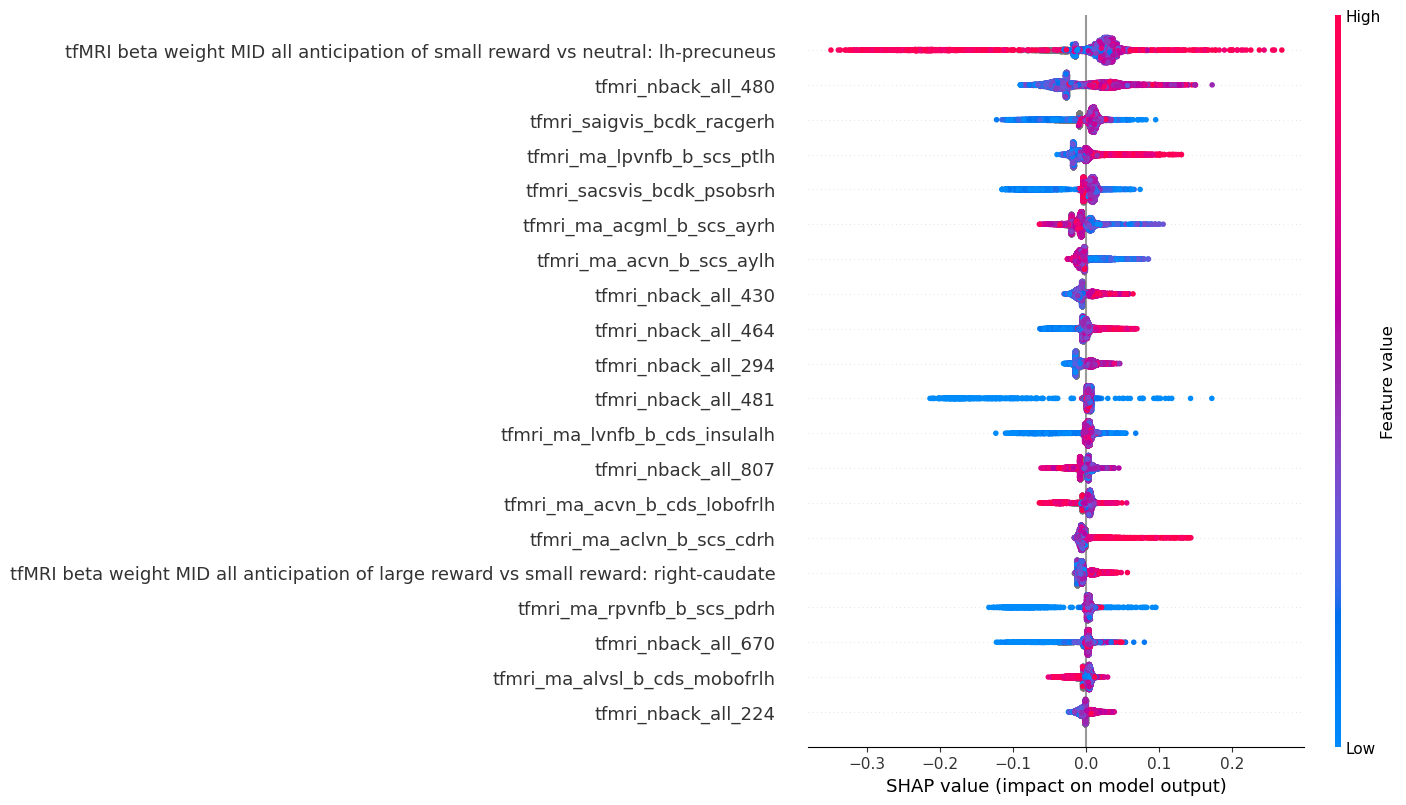

In [19]:
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('default')
shap.summary_plot(old_api_shap_values, X_display)

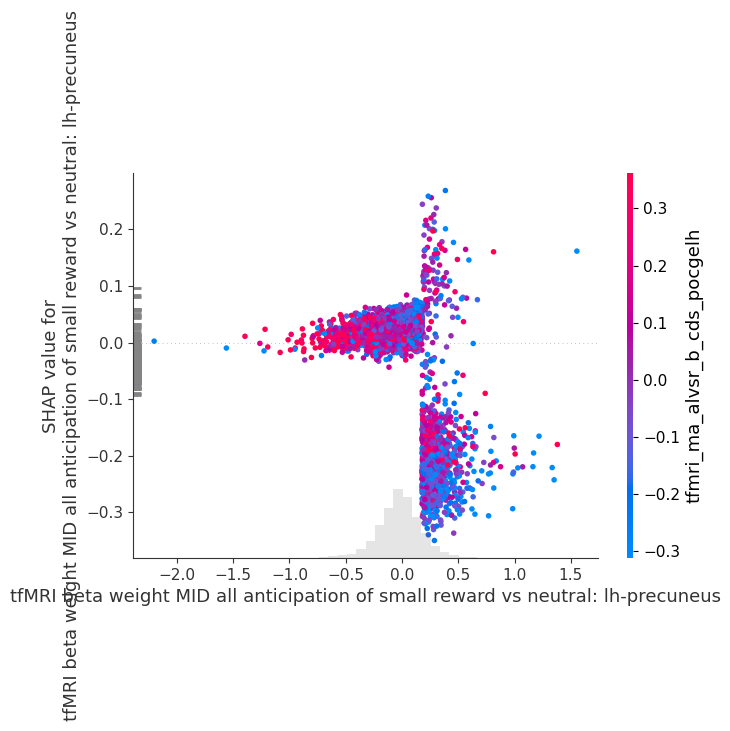

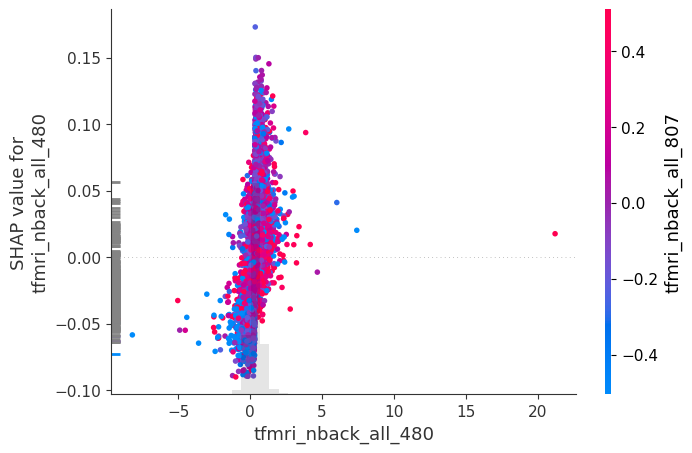

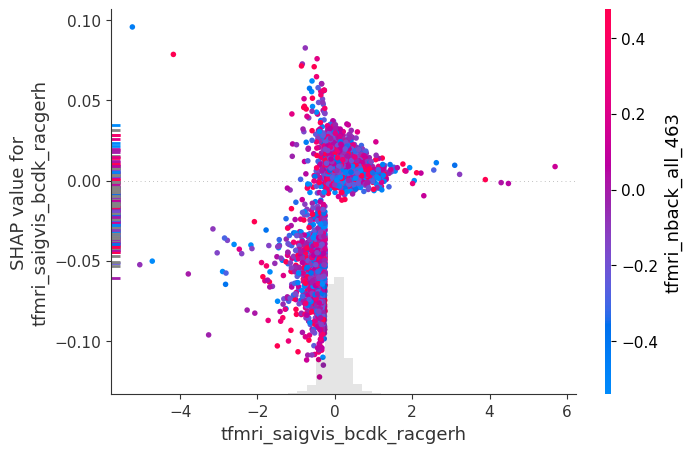

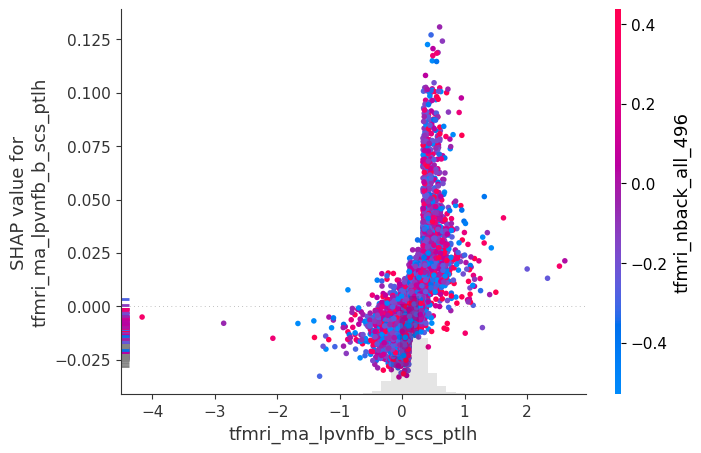

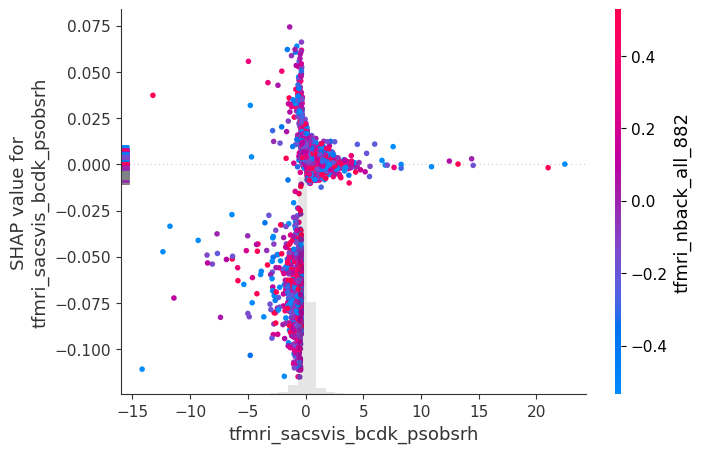

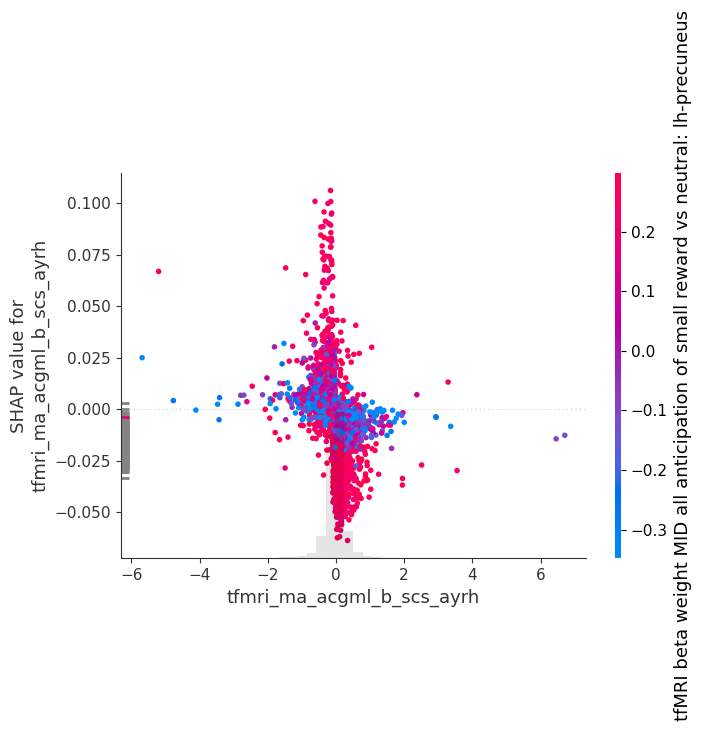

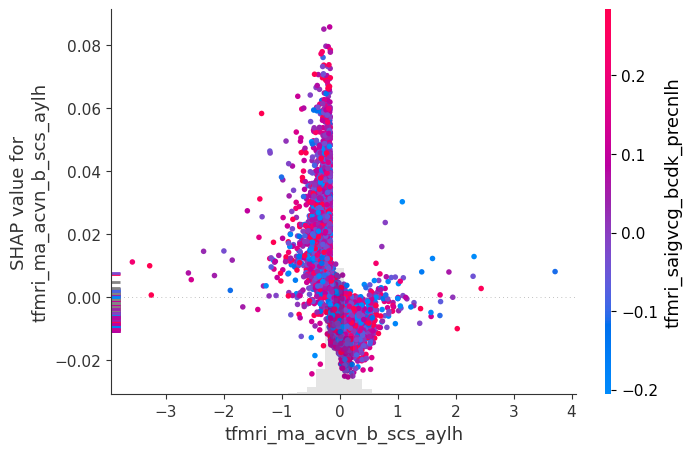

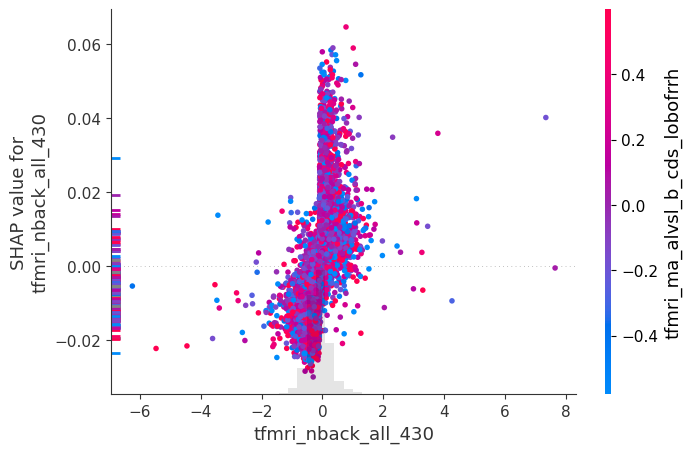

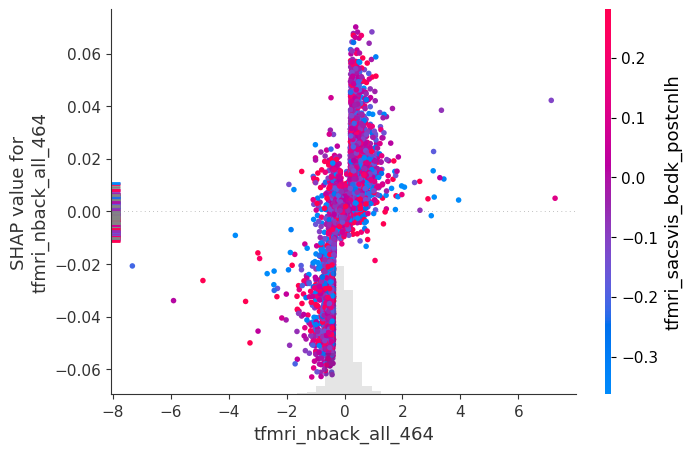

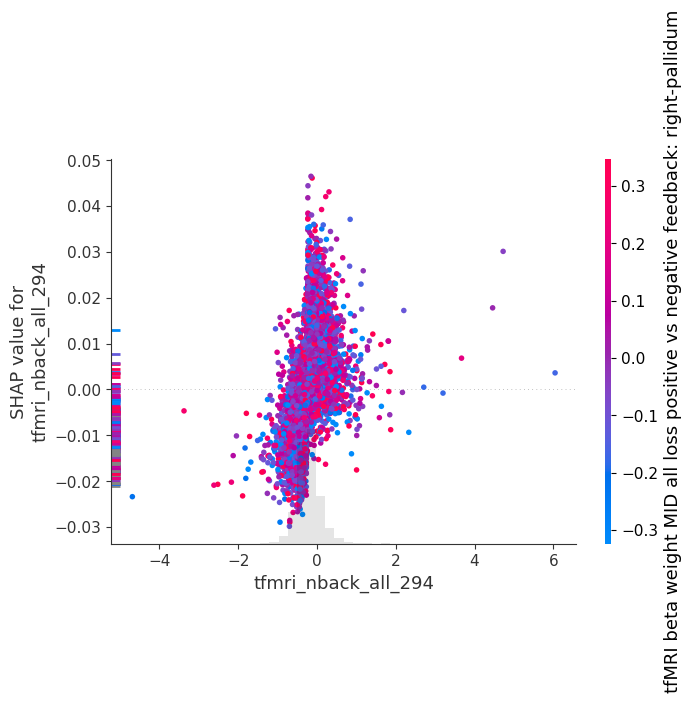

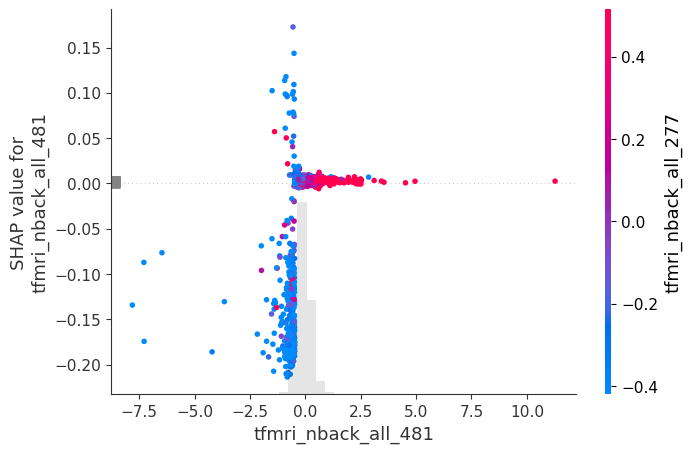

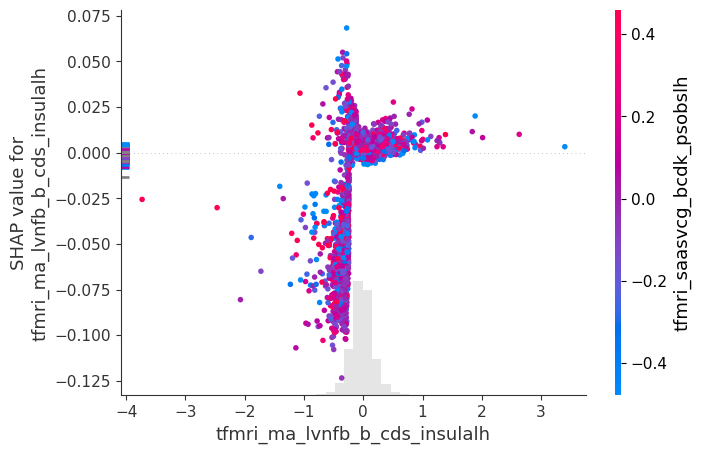

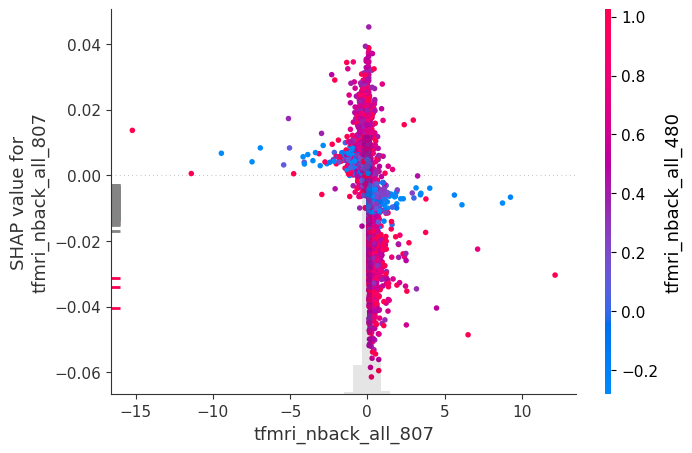

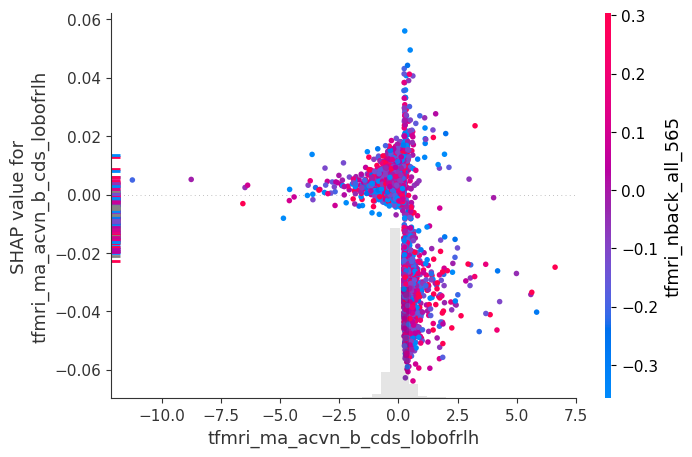

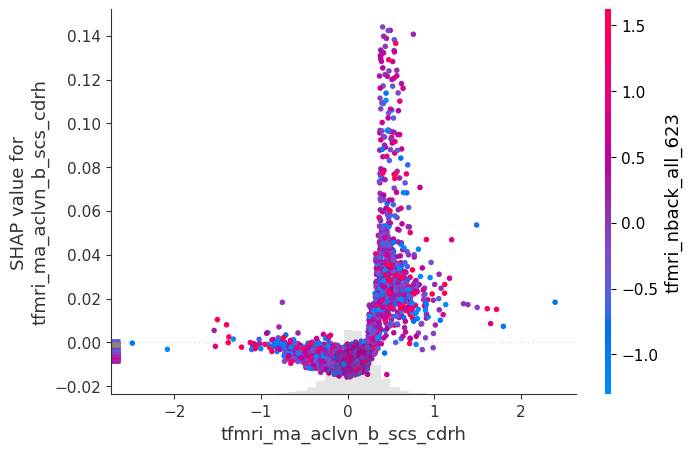

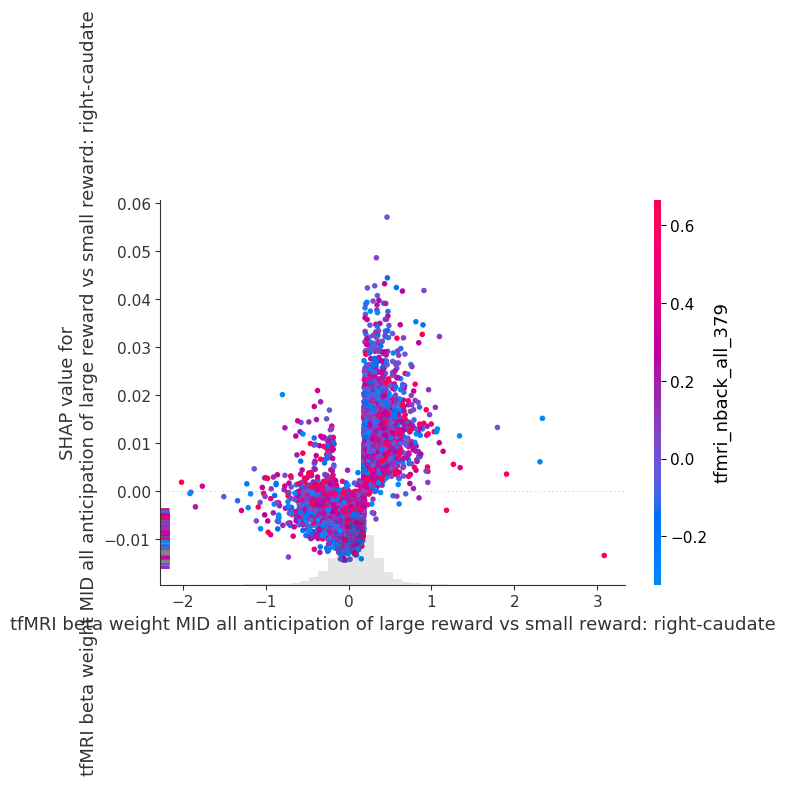

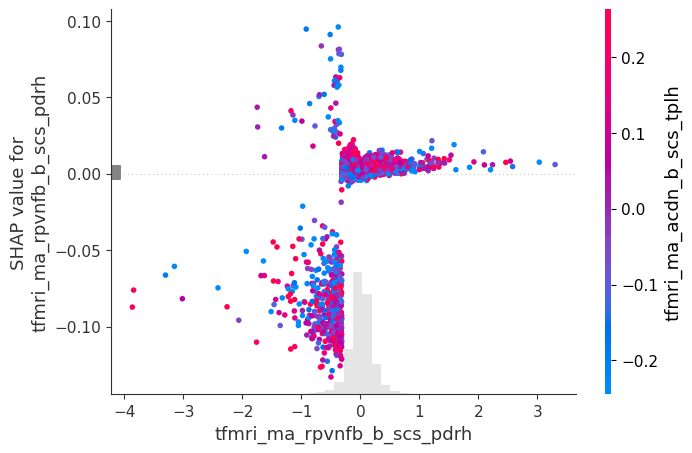

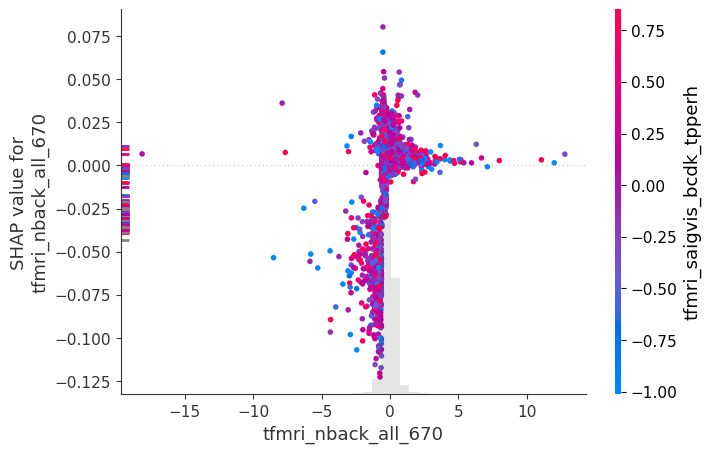

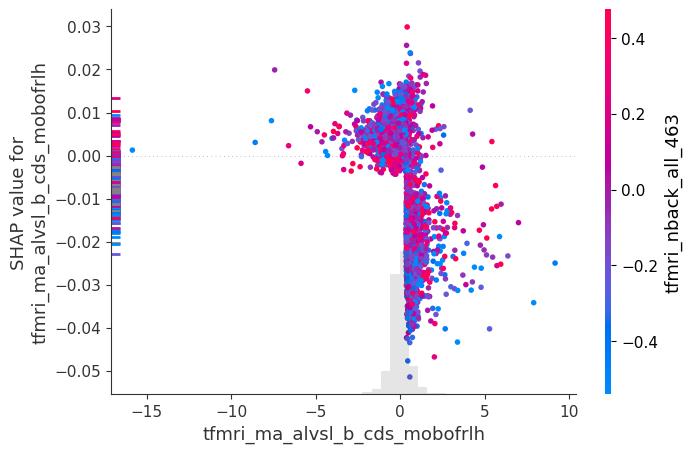

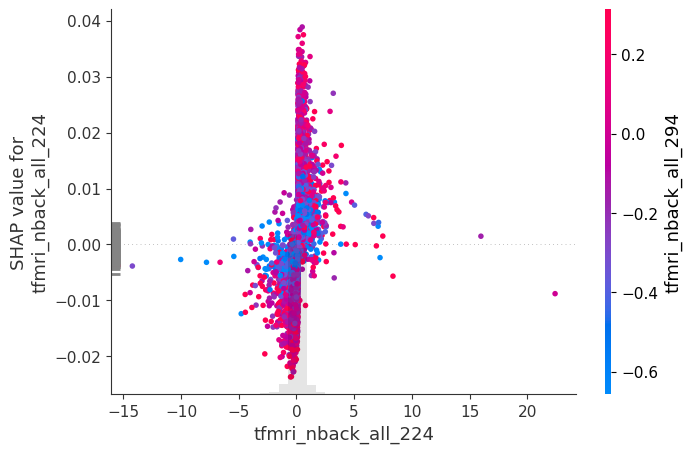

In [20]:
new_api_shap_values = explainer(X)

top_inds = np.argsort(-np.sum(np.abs(new_api_shap_values.values), 0))
for i in range(20):
    shap.plots.scatter(new_api_shap_values[:, top_inds[i]], color=new_api_shap_values)